# Validation Backward Compatibility (VBC) Source2Suffering Framework

__Objective__ : The aim of this Jupyter Notebook is to sequentially compare the different values produced by the original Lifetime Exposure framework developed by Thiery et al. (2021) and the Source2Suffering framework developed in Laridon et al. (2025). As a final benchmark to compare the results of both frameworks, we will examine the findings of the Expert Opinion written by Prof. W. Thiery for Greenpeace Romania regarding the "Neptun Deep" oil field project.

__Author__ : Amaury Laridon

__Date__ : 21 May 2025

---

Init Libraries and path

In [57]:
#%%  ----------------------------------------------------------------
# import and path
# ----------------------------------------------------------------

import xarray as xr
import pickle as pk
import time
# from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import mapclassify as mc
from copy import deepcopy as cp
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy as cr
import geopandas as gpd
import sys
from operator import index
import numpy as np
import pandas as pd
from scipy import interpolate
from scipy import stats as sts
import regionmask as rm
import glob
%matplotlib inline

notebook_path = os.getcwd()  # Current path
print("Directory of the notebook:", notebook_path)
notebook_path = notebook_path

scripts_dir = "/data/brussel/vo/000/bvo00012/vsc11137/source2suffering"
data_dir = scripts_dir+"/data/"

sys.path.append(os.path.abspath(scripts_dir))

Directory of the notebook: /vscmnt/brussel_pixiu_data/_data_brussel/vo/000/bvo00012/vsc11137/source2suffering/sandbox


Settings

In [58]:
ages = np.arange(60,-1,-1)
age_young = 0
age_ref = np.nanmax(ages)
age_range = np.arange(0,105)
year_ref = 2020
year_start = year_ref - age_ref
birth_years = np.arange(year_start,year_ref+1)     
year_end = 2113 # based on maximum life expectancy reported in UNWPP
year_range = np.arange(year_start,year_end+1)
# Definition of the hazards 
hazards = [
    "burntarea",
    "cropfailedarea",
    "driedarea",
    "floodedarea",
    "heatwavedarea",
    "tropicalcyclonedarea"
]

## 1. Results of the Land Fraction Exposed (LFE) to hazard annually 

Here I compare Fig.(1a) of Thiery et al.(2021) with the results of the Source2Suffering framework

### Effect of the smoothing before remapping

#### A. Results with Smoothing 

In [59]:
with open(data_dir+'{}/{}/ds_lfe_perregion_gmt_{}_{}.pkl'.format('pickles_v3','heatwavedarea','original','rm'), 'rb') as f:
            ds_lfe_perregion_rm = pk.load(f)

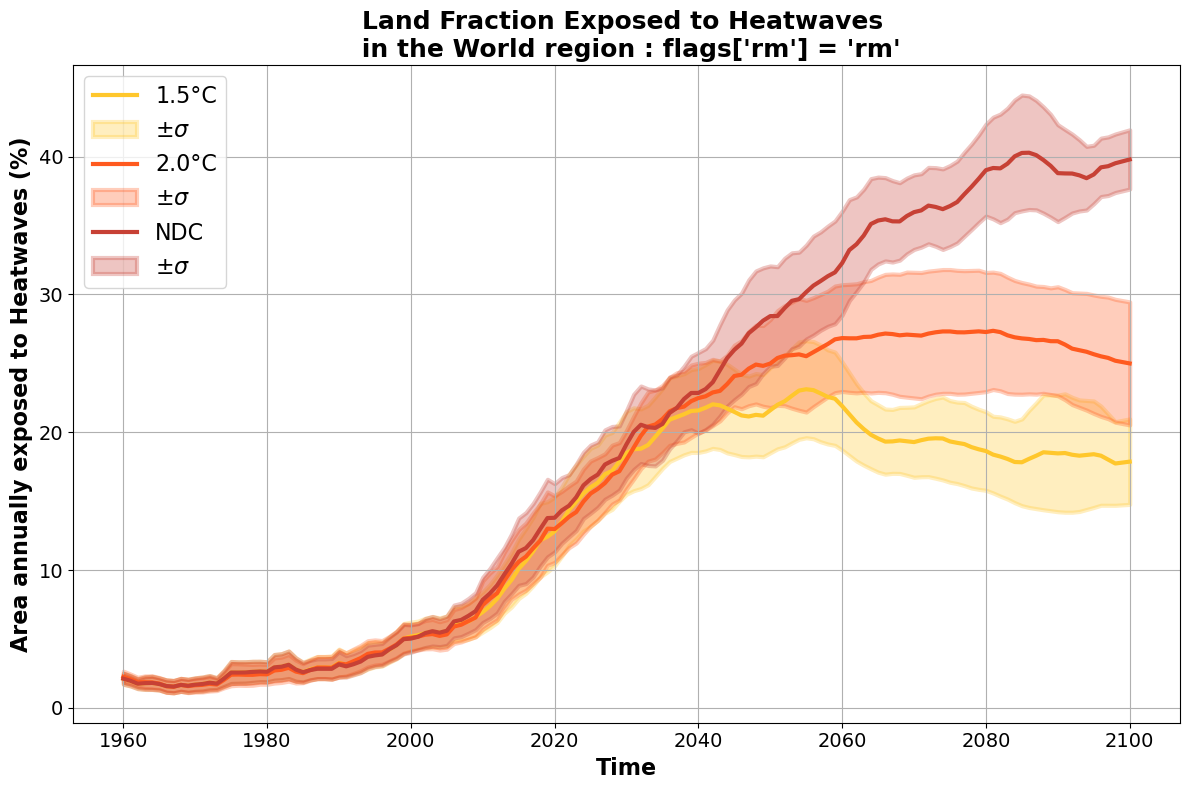

In [60]:
plt.close('all') 

plt.figure(figsize=(12, 8))

extr_name = 'Heatwaves'
GMT_label = ['1.5°C', '2.0°C','NDC']  
GMT_color = ['#FFC72C', '#FF5A1F', '#C74135']
region_name = 'World'
ind_region = 11

    
lfe_15_rm = ds_lfe_perregion_rm['mmm_15_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))

y_std_15_rm = ds_lfe_perregion_rm['std_15_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))/2

lfe_20_rm = ds_lfe_perregion_rm['mmm_20_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))

y_std_20_rm = ds_lfe_perregion_rm['std_20_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))/2

lfe_NDC_rm = ds_lfe_perregion_rm['mmm_NDC_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))

y_std_NDC_rm = ds_lfe_perregion_rm['std_NDC_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))/2

plt.plot(year_range[:-13], lfe_15_rm*100, linestyle='-',color=GMT_color[0],label=GMT_label[0], lw=3)
plt.fill_between(year_range[:-13], lfe_15_rm*100 - y_std_15_rm*100, lfe_15_rm*100 + y_std_15_rm*100, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[0], lw=3)

plt.plot(year_range[:-13], lfe_20_rm*100, linestyle='-',color=GMT_color[1],label=GMT_label[1], lw=3)
plt.fill_between(year_range[:-13], lfe_20_rm*100 - y_std_20_rm*100, lfe_20_rm*100 + y_std_20_rm*100, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[1], lw=3)

plt.plot(year_range[:-13],lfe_NDC_rm*100, linestyle='-',color=GMT_color[2],label=GMT_label[2], lw=3)
plt.fill_between(year_range[:-13], lfe_NDC_rm*100 - y_std_NDC_rm*100, lfe_NDC_rm*100 + y_std_NDC_rm*100, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[2], lw=3)

plt.title("Land Fraction Exposed to {} \n in the {} region : flags['rm'] = 'rm'".format(extr_name, region_name),fontsize=18,fontweight='bold')
plt.xlabel("Time",fontsize=16,fontweight='bold')
plt.ylabel("Area annually exposed to {} (%)".format(extr_name),fontsize=16,fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig1_lfe_gmt_original_rm.png')
plt.show()

#### B. Results without Smoothing 

In [61]:
with open(data_dir+'{}/{}/ds_lfe_perregion_gmt_{}_{}.pkl'.format('pickles_v3','heatwavedarea','original','no_rm'), 'rb') as f:
            ds_lfe_perregion_no_rm = pk.load(f)

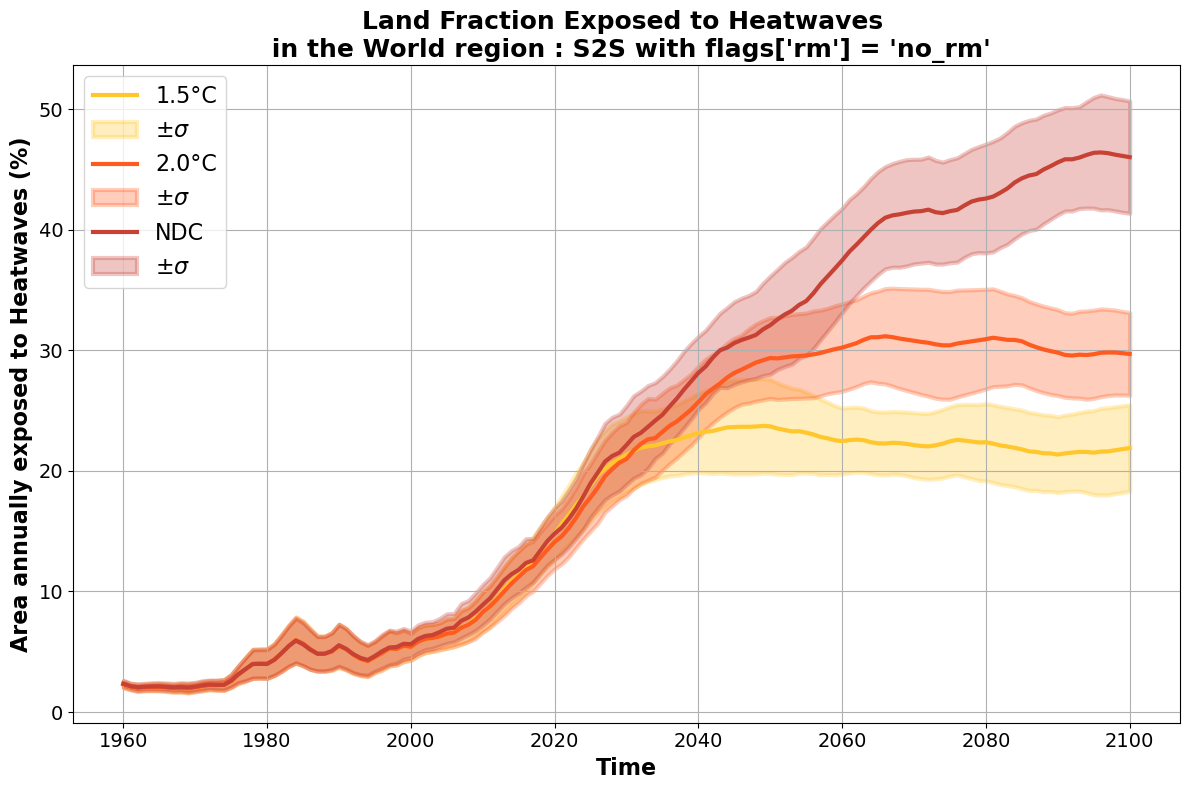

In [62]:
plt.close('all') 

plt.figure(figsize=(12, 8))

extr_name = 'Heatwaves'
GMT_label = ['1.5°C', '2.0°C','NDC']  
GMT_color = ['#FFC72C', '#FF5A1F', '#C74135']
region_name = 'World'
ind_region = 11

    
lfe_15_no_rm = ds_lfe_perregion_no_rm['mmm_15_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))

y_std_15_no_rm = ds_lfe_perregion_no_rm['std_15_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))/2

lfe_20_no_rm = ds_lfe_perregion_no_rm['mmm_20_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))

y_std_20_no_rm = ds_lfe_perregion_no_rm['std_20_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))/2

lfe_NDC_no_rm = ds_lfe_perregion_no_rm['mmm_NDC_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))

y_std_NDC_no_rm = ds_lfe_perregion_no_rm['std_NDC_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))/2

plt.plot(year_range[:-13], lfe_15_no_rm*100, linestyle='-',color=GMT_color[0],label=GMT_label[0], lw=3)
plt.fill_between(year_range[:-13], lfe_15_no_rm*100 - y_std_15_no_rm*100, lfe_15_no_rm*100 + y_std_15_no_rm*100, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[0], lw=3)

plt.plot(year_range[:-13], lfe_20_no_rm*100, linestyle='-',color=GMT_color[1],label=GMT_label[1], lw=3)
plt.fill_between(year_range[:-13], lfe_20_no_rm*100 - y_std_20_no_rm*100, lfe_20_no_rm*100 + y_std_20_no_rm*100, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[1], lw=3)

plt.plot(year_range[:-13],lfe_NDC_no_rm*100, linestyle='-',color=GMT_color[2],label=GMT_label[2], lw=3)
plt.fill_between(year_range[:-13], lfe_NDC_no_rm*100 - y_std_NDC_no_rm*100, lfe_NDC_no_rm*100 + y_std_NDC_no_rm*100, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[2], lw=3)

plt.title("Land Fraction Exposed to {} \n in the {} region : S2S with flags['rm'] = 'no_rm'".format(extr_name, region_name),fontsize=18,fontweight='bold')
plt.xlabel("Time",fontsize=16,fontweight='bold')
plt.ylabel("Area annually exposed to {} (%)".format(extr_name),fontsize=16,fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig2_lfe_gmt_original_no_rm.png')
plt.show()

#### C. Comparison between flags['rm'] within the Source2Suffering Framework

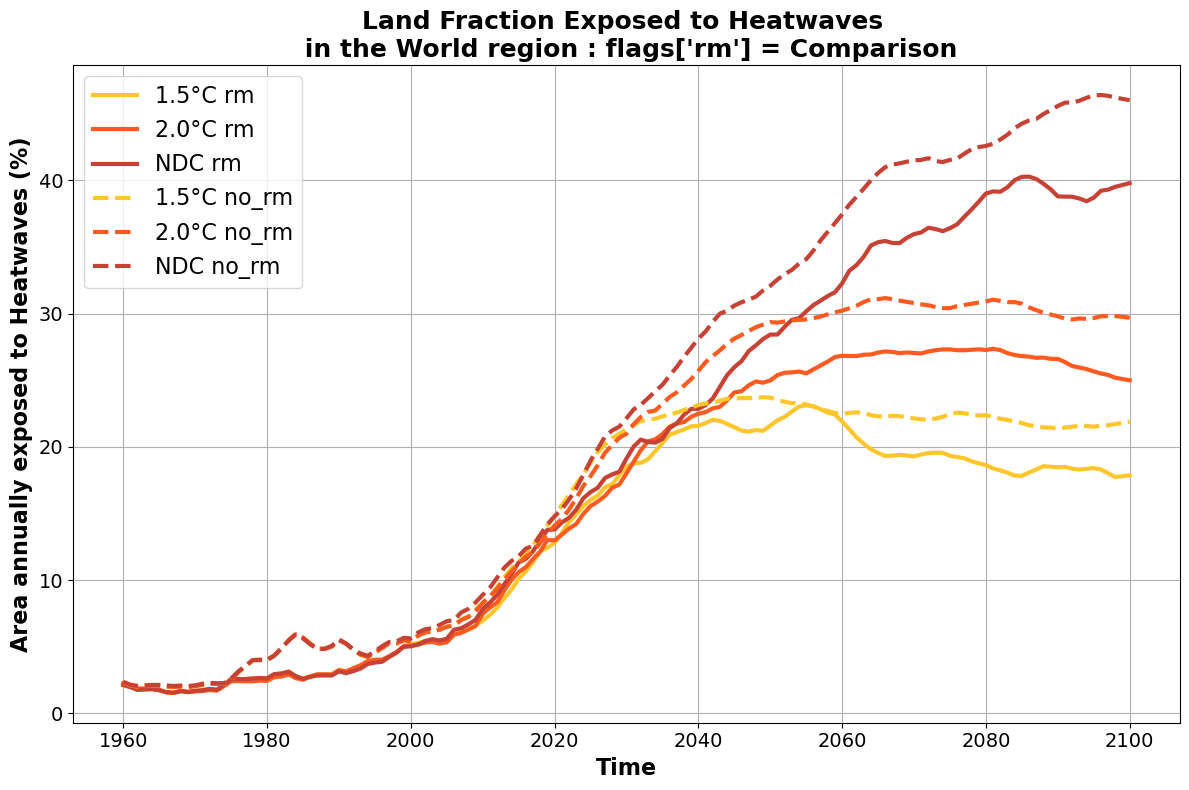

In [63]:
plt.close('all') 

plt.figure(figsize=(12, 8))

plt.plot(year_range[:-13], lfe_15_rm*100, linestyle='-',color=GMT_color[0],label=GMT_label[0] + ' rm', lw=3)
#plt.fill_between(year_range[:-13], lfe_15_rm - y_std_15_rm, lfe_15_rm + y_std_15_rm, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[0], lw=3)

plt.plot(year_range[:-13], lfe_20_rm*100, linestyle='-',color=GMT_color[1],label=GMT_label[1] + ' rm', lw=3)
#plt.fill_between(year_range[:-13], lfe_20_rm - y_std_20_rm, lfe_20_rm + y_std_20_rm, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[1], lw=3)

plt.plot(year_range[:-13],lfe_NDC_rm*100, linestyle='-',color=GMT_color[2],label=GMT_label[2] + ' rm', lw=3)
#plt.fill_between(year_range[:-13], lfe_NDC_rm - y_std_NDC_rm, lfe_NDC_rm + y_std_NDC_rm, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[2], lw=3)

plt.plot(year_range[:-13], lfe_15_no_rm*100, linestyle='--',color=GMT_color[0],label=GMT_label[0] + ' no_rm', lw=3)
#plt.fill_between(year_range[:-13], lfe_15_no_rm - y_std_15_no_rm, lfe_15_no_rm + y_std_15_no_rm, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[0], lw=3)

plt.plot(year_range[:-13], lfe_20_no_rm*100, linestyle='--',color=GMT_color[1],label=GMT_label[1] + ' no_rm', lw=3)
#plt.fill_between(year_range[:-13], lfe_20_no_rm - y_std_20_no_rm, lfe_20_no_rm + y_std_20_no_rm, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[1], lw=3)

plt.plot(year_range[:-13],lfe_NDC_no_rm*100, linestyle='--',color=GMT_color[2],label=GMT_label[2] + ' no_rm', lw=3)
#plt.fill_between(year_range[:-13], lfe_NDC_no_rm - y_std_NDC_no_rm, lfe_NDC_no_rm + y_std_NDC_no_rm, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[2], lw=3)

plt.title("Land Fraction Exposed to {} \n in the {} region : flags['rm'] = Comparison".format(extr_name, region_name),fontsize=18,fontweight='bold')
plt.xlabel("Time",fontsize=16,fontweight='bold')
plt.ylabel("Area annually exposed to {} (%)".format(extr_name),fontsize=16,fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig3_lfe_gmt_original_rm_comp.png')
plt.show()

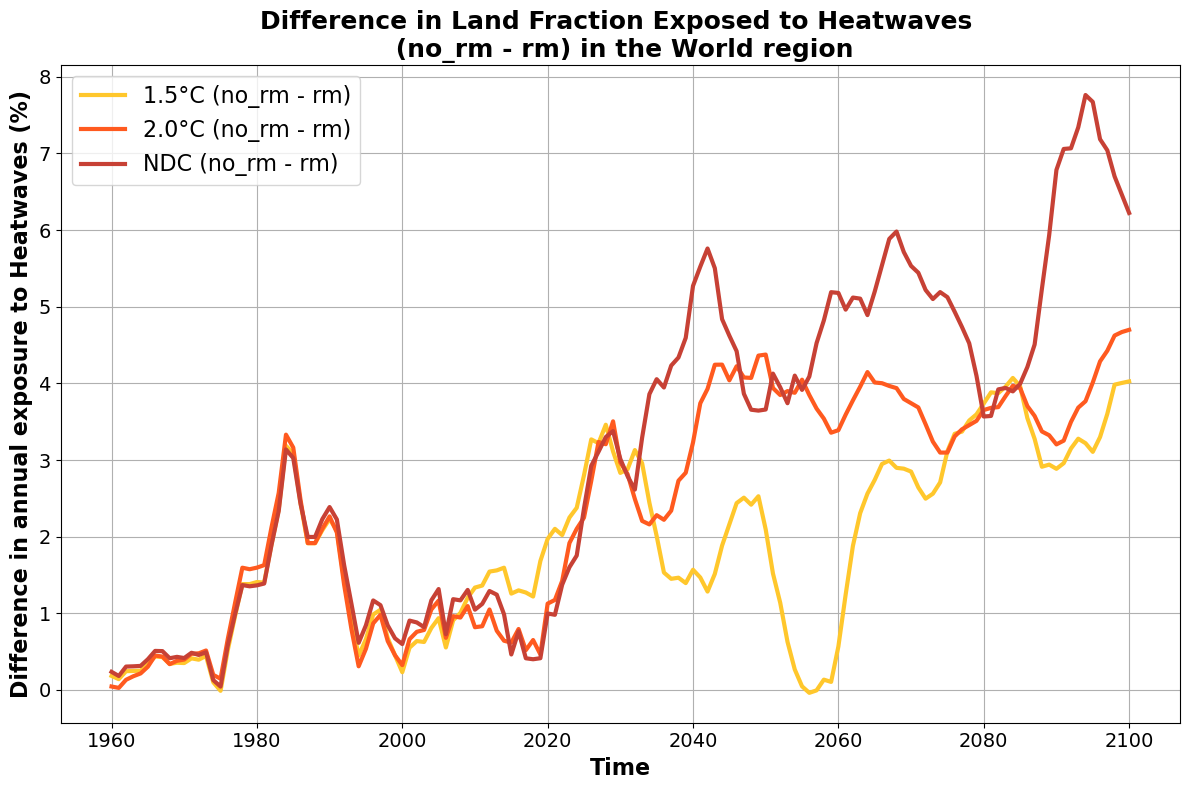

In [64]:
plt.close('all')

plt.figure(figsize=(12, 8))

# Tracer la différence (no_rm - rm) pour chaque scénario
plt.plot(
    year_range[:-13],
    (lfe_15_no_rm - lfe_15_rm)*100,
    linestyle='-',
    color=GMT_color[0],
    label=GMT_label[0] + ' (no_rm - rm)',
    lw=3
)

plt.plot(
    year_range[:-13],
    (lfe_20_no_rm - lfe_20_rm)*100,
    linestyle='-',
    color=GMT_color[1],
    label=GMT_label[1] + ' (no_rm - rm)',
    lw=3
)

plt.plot(
    year_range[:-13],
    (lfe_NDC_no_rm - lfe_NDC_rm)*100,
    linestyle='-',
    color=GMT_color[2],
    label=GMT_label[2] + ' (no_rm - rm)',
    lw=3
)

# Mise en forme du graphique
plt.title(
    "Difference in Land Fraction Exposed to {} \n (no_rm - rm) in the {} region".format(extr_name, region_name),
    fontsize=18,
    fontweight='bold'
)
plt.xlabel("Time", fontsize=16, fontweight='bold')
plt.ylabel("Difference in annual exposure to {} (%)".format(extr_name), fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig4_lfe_gmt_original_rm_diff.png')
plt.show()

#### D. Comparison between Source2Suffering framework with and flags['rm']='no_rm' and Thiery et al.(2021)

Import the .mat objects

In [65]:
from scipy.io import loadmat

WT_landfrac_15_plot = loadmat(scripts_dir+'/references/lifetime_exposure_wim/lifetime_exposure_wim_v1/landfrac_15_plot.mat',squeeze_me=True)

WT_landfrac_15_plot = WT_landfrac_15_plot['landfrac_15_plot'][:-13]

WT_landfrac_15_plot_mms = loadmat(scripts_dir+'/references/lifetime_exposure_wim/lifetime_exposure_wim_v1/landfrac_15_plot_mms.mat',squeeze_me=True)

WT_landfrac_15_plot_mms = WT_landfrac_15_plot_mms['landfrac_15_mms_plot'][:-13]/2

WT_landfrac_20_plot = loadmat(scripts_dir+'/references/lifetime_exposure_wim/lifetime_exposure_wim_v1/landfrac_20_plot.mat',squeeze_me=True)

WT_landfrac_20_plot = WT_landfrac_20_plot['landfrac_20_plot'][:-13]

WT_landfrac_20_plot_mms = loadmat(scripts_dir+'/references/lifetime_exposure_wim/lifetime_exposure_wim_v1/landfrac_20_plot_mms.mat',squeeze_me=True)

WT_landfrac_20_plot_mms = WT_landfrac_20_plot_mms['landfrac_20_mms_plot'][:-13]/2

WT_landfrac_NDC_plot = loadmat(scripts_dir+'/references/lifetime_exposure_wim/lifetime_exposure_wim_v1/landfrac_NDC_plot.mat',squeeze_me=True)

WT_landfrac_NDC_plot = WT_landfrac_NDC_plot['landfrac_NDC_plot'][:-13]

WT_landfrac_NDC_plot_mms = loadmat(scripts_dir+'/references/lifetime_exposure_wim/lifetime_exposure_wim_v1/landfrac_NDC_plot_mms.mat',squeeze_me=True)

WT_landfrac_NDC_plot_mms = WT_landfrac_NDC_plot_mms['landfrac_NDC_mms_plot'][:-13]/2


Plot of Thiery et al.(2021) results

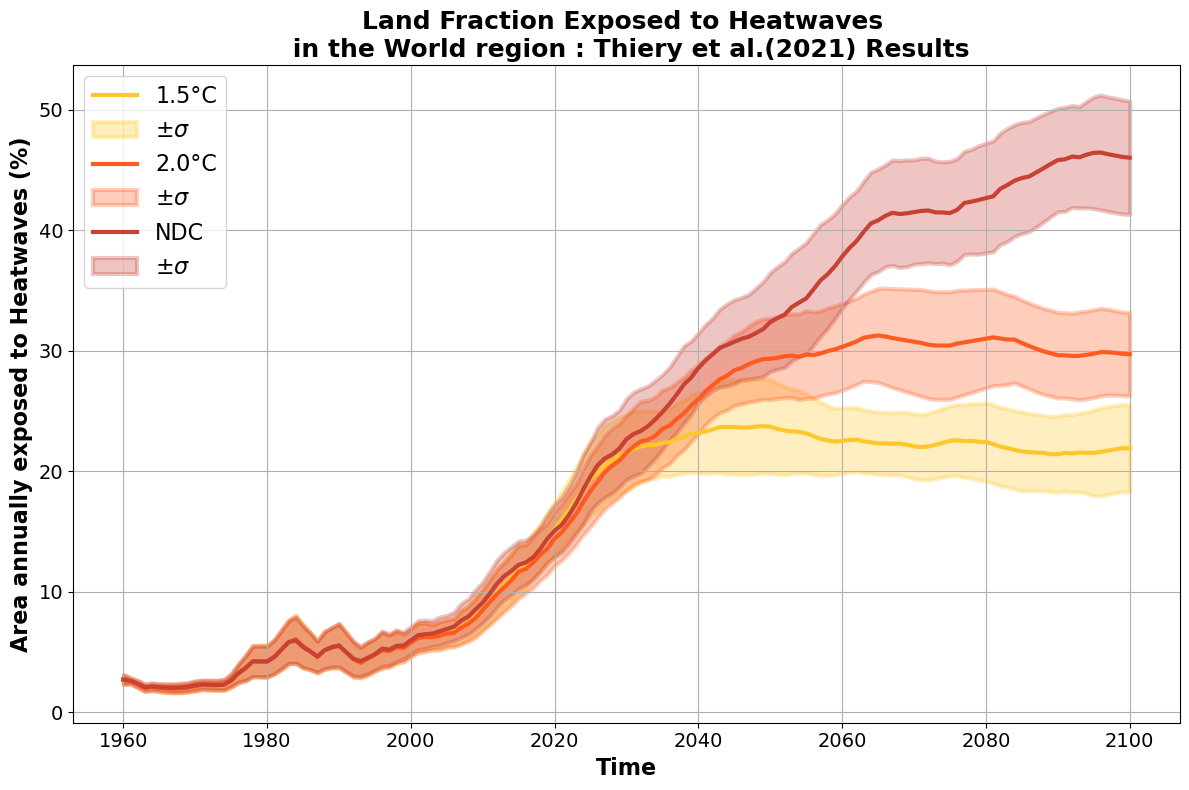

In [66]:
plt.close('all') 

plt.figure(figsize=(12, 8))

extr_name = 'Heatwaves'
GMT_label = ['1.5°C', '2.0°C','NDC']  
GMT_color = ['#FFC72C', '#FF5A1F', '#C74135']
region_name = 'World'
ind_region = 11

plt.plot(year_range[:-13], WT_landfrac_15_plot, linestyle='-',color=GMT_color[0],label=GMT_label[0], lw=3)
plt.fill_between(year_range[:-13], WT_landfrac_15_plot - WT_landfrac_15_plot_mms, WT_landfrac_15_plot + WT_landfrac_15_plot_mms, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[0], lw=3)

plt.plot(year_range[:-13], WT_landfrac_20_plot, linestyle='-',color=GMT_color[1],label=GMT_label[1], lw=3)
plt.fill_between(year_range[:-13], WT_landfrac_20_plot - WT_landfrac_20_plot_mms, WT_landfrac_20_plot + WT_landfrac_20_plot_mms, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[1], lw=3)

plt.plot(year_range[:-13],WT_landfrac_NDC_plot, linestyle='-',color=GMT_color[2],label=GMT_label[2], lw=3)
plt.fill_between(year_range[:-13], WT_landfrac_NDC_plot - WT_landfrac_NDC_plot_mms, WT_landfrac_NDC_plot + WT_landfrac_NDC_plot_mms, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[2], lw=3)

plt.title("Land Fraction Exposed to {} \n in the {} region : Thiery et al.(2021) Results".format(extr_name, region_name),fontsize=18,fontweight='bold')
plt.xlabel("Time",fontsize=16,fontweight='bold')
plt.ylabel("Area annually exposed to {} (%)".format(extr_name),fontsize=16,fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig5_lfe_gmt_thiery_et_al.png')
plt.show()

Plot of the S2S flags['rm'] = 'no_rm' and Thiery et al.(2021) results

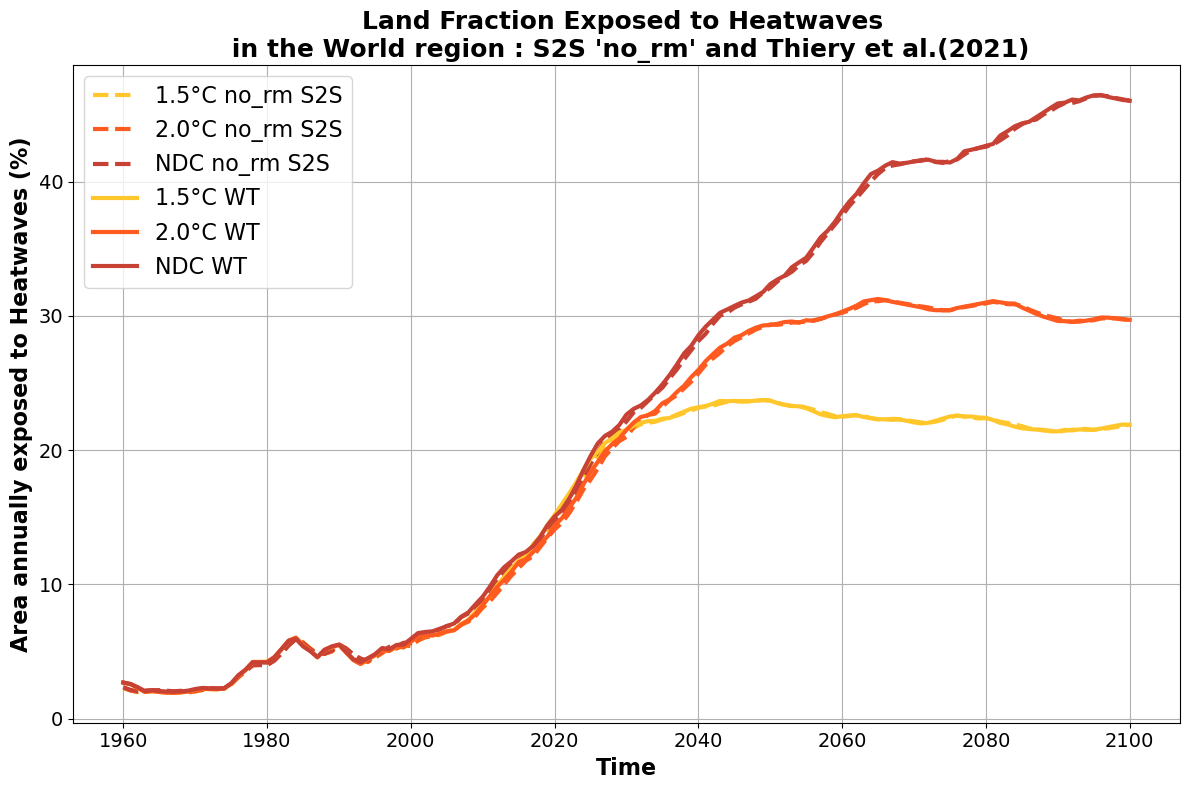

In [67]:
plt.close('all') 

plt.figure(figsize=(12, 8))

plt.plot(year_range[:-13], lfe_15_no_rm*100, linestyle='--',color=GMT_color[0],label=GMT_label[0] + ' no_rm S2S', lw=3)

plt.plot(year_range[:-13], lfe_20_no_rm*100, linestyle='--',color=GMT_color[1],label=GMT_label[1] + ' no_rm S2S', lw=3)

plt.plot(year_range[:-13],lfe_NDC_no_rm*100, linestyle='--',color=GMT_color[2],label=GMT_label[2] + ' no_rm S2S', lw=3)

plt.plot(year_range[:-13], WT_landfrac_15_plot, linestyle='-',color=GMT_color[0],label=GMT_label[0] + ' WT', lw=3)

plt.plot(year_range[:-13], WT_landfrac_20_plot, linestyle='-',color=GMT_color[1],label=GMT_label[1] + ' WT', lw=3)

plt.plot(year_range[:-13], WT_landfrac_NDC_plot, linestyle='-',color=GMT_color[2],label=GMT_label[2] + ' WT', lw=3)

plt.title("Land Fraction Exposed to {} \n in the {} region : S2S 'no_rm' and Thiery et al.(2021)".format(extr_name, region_name),fontsize=18,fontweight='bold')
plt.xlabel("Time",fontsize=16,fontweight='bold')
plt.ylabel("Area annually exposed to {} (%)".format(extr_name),fontsize=16,fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig6a_lfe_gmt_original_no_rm_thiery_et_al_comp.png')
plt.show()

Plot of the S2S flags['rm'] = 'no_rm' - Thiery et al.(2021) results

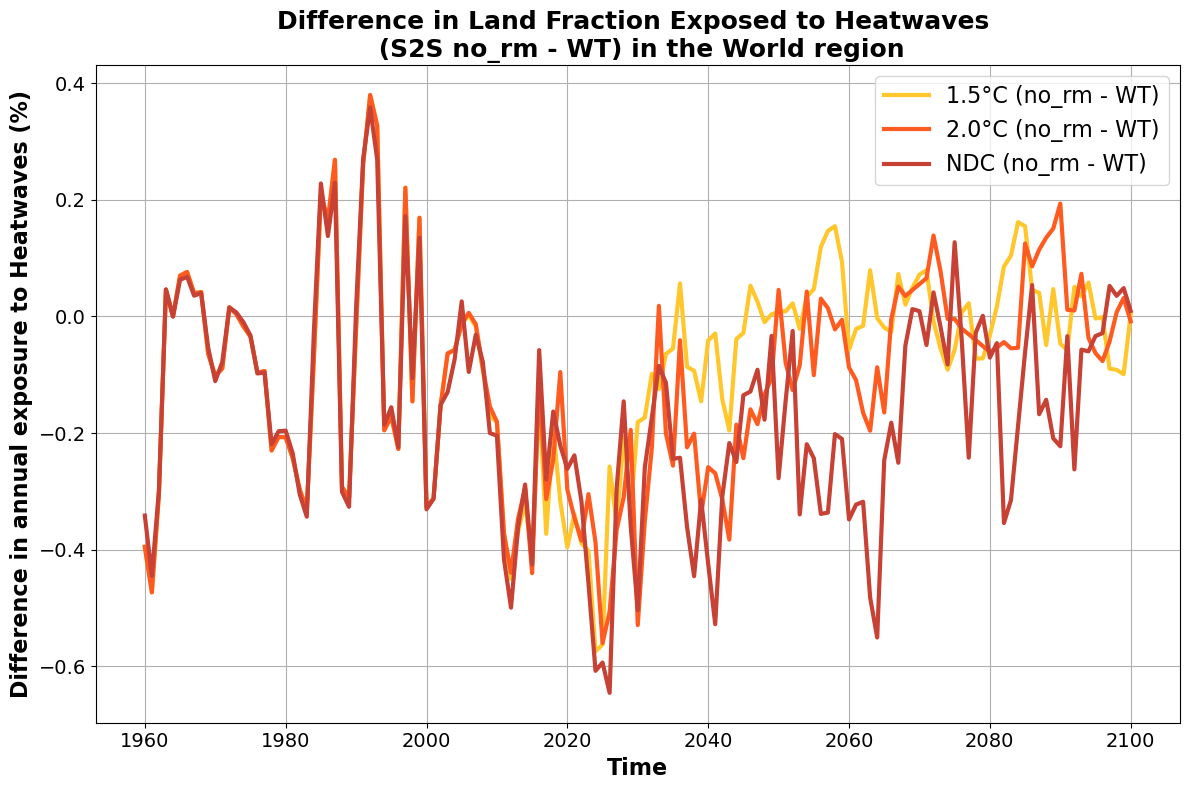

In [68]:
plt.close('all')

plt.figure(figsize=(12, 8))

# Tracer la différence (no_rm - rm) pour chaque scénario
plt.plot(
    year_range[:-13],
    ((lfe_15_no_rm)*100 - WT_landfrac_15_plot),
    linestyle='-',
    color=GMT_color[0],
    label=GMT_label[0] + ' (no_rm - WT)',
    lw=3
)

plt.plot(
    year_range[:-13],
    ((lfe_20_no_rm)*100 - WT_landfrac_20_plot),
    linestyle='-',
    color=GMT_color[1],
    label=GMT_label[1] + ' (no_rm - WT)',
    lw=3
)

plt.plot(
    year_range[:-13],
    ((lfe_NDC_no_rm)*100- WT_landfrac_NDC_plot),
    linestyle='-',
    color=GMT_color[2],
    label=GMT_label[2] + ' (no_rm - WT)',
    lw=3
)

# Mise en forme du graphique
plt.title(
    "Difference in Land Fraction Exposed to {} \n (S2S no_rm - WT) in the {} region".format(extr_name, region_name),
    fontsize=18,
    fontweight='bold'
)
plt.xlabel("Time", fontsize=16, fontweight='bold')
plt.ylabel("Difference in annual exposure to {} (%)".format(extr_name), fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig6b_lfe_gmt_original_no_rm_thiery_et_al_diff.png')
plt.show()

Plot of the error between S2S flags['rm'] = 'no_rm' - Thiery et al.(2021) results

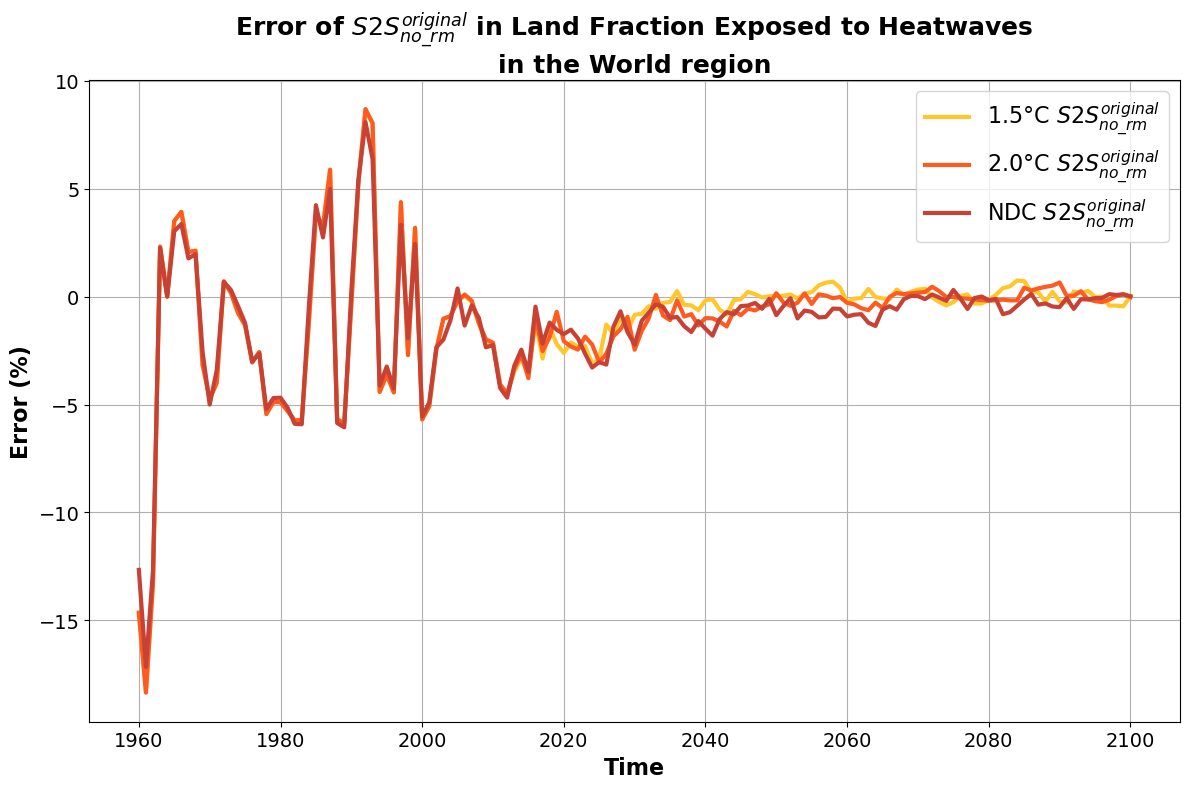

In [69]:
plt.close('all')

plt.figure(figsize=(12, 8))

# Tracer la différence (no_rm - rm) pour chaque scénario
plt.plot(
    year_range[:-13],
    (((lfe_15_no_rm)*100 - WT_landfrac_15_plot)/WT_landfrac_15_plot)*100,
    linestyle='-',
    color=GMT_color[0],
    label=GMT_label[0] + r' $S2S_{no\_rm}^{original}$',
    lw=3
)

plt.plot(
    year_range[:-13],
    (((lfe_20_no_rm)*100 - WT_landfrac_20_plot)/WT_landfrac_20_plot)*100,
    linestyle='-',
    color=GMT_color[1],
    label=GMT_label[1] + r' $S2S_{no\_rm}^{original}$',
    lw=3
)

plt.plot(
    year_range[:-13],
    (((lfe_NDC_no_rm)*100- WT_landfrac_NDC_plot)/WT_landfrac_NDC_plot)*100,
    linestyle='-',
    color=GMT_color[2],
    label=GMT_label[2] + r' $S2S_{no\_rm}^{original}$',
    lw=3
)

# Mise en forme du graphique
plt.title(
    "Error of " + r"$S2S_{no\_rm}^{original}$" + " in Land Fraction Exposed to {} \nin the {} region".format(extr_name, region_name),
    fontsize=18,
    fontweight='bold'
)
plt.xlabel("Time", fontsize=16, fontweight='bold')
plt.ylabel("Error (%)".format(extr_name), fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig6c_lfe_gmt_original_no_rm_thiery_et_al_error.png')
plt.show()

Plot of the $\sigma$ of S2S flags['rm'] = 'no_rm' and Thiery et al.(2021) results

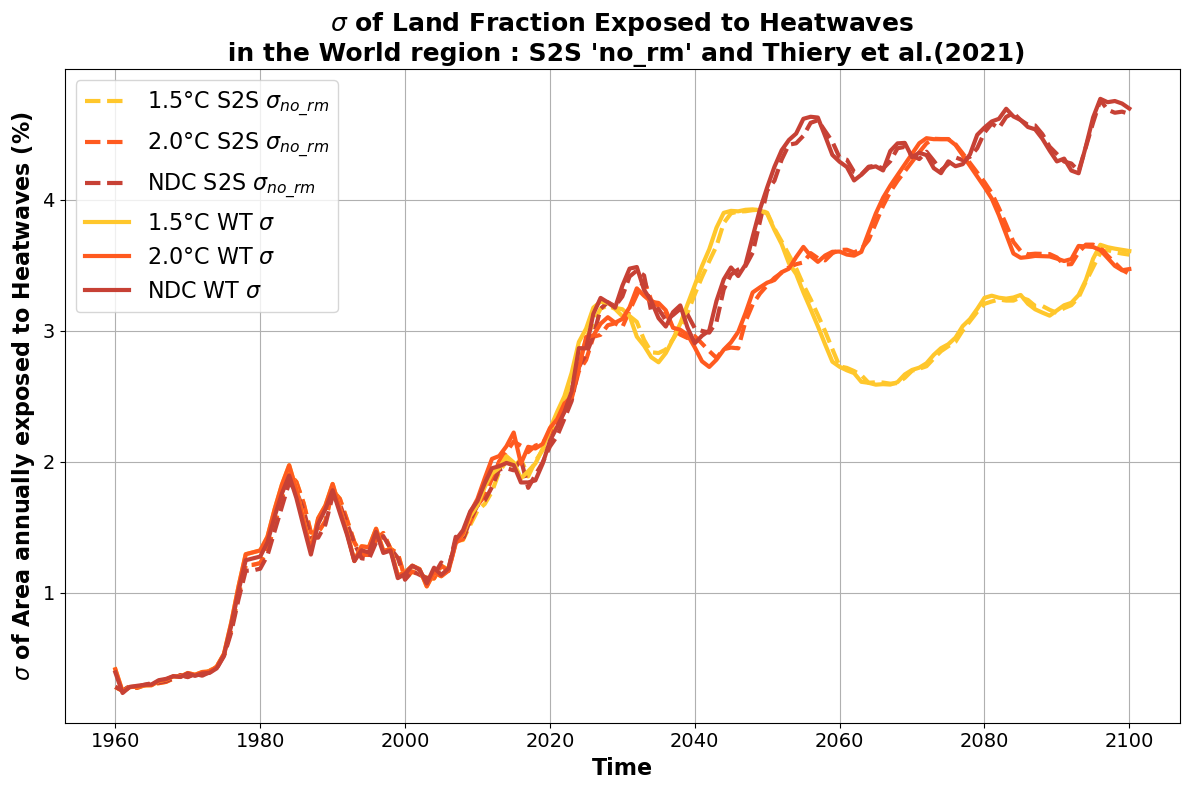

In [70]:
plt.close('all') 

plt.figure(figsize=(12, 8))

plt.plot(year_range[:-13], y_std_15_no_rm*100, linestyle='--',color=GMT_color[0],label=GMT_label[0] + ' S2S' + r' $\sigma_{no\_rm}$', lw=3)

plt.plot(year_range[:-13], y_std_20_no_rm*100, linestyle='--',color=GMT_color[1],label=GMT_label[1] + ' S2S' + r' $\sigma_{no\_rm}$', lw=3)

plt.plot(year_range[:-13], y_std_NDC_no_rm*100, linestyle='--',color=GMT_color[2],label=GMT_label[2] + ' S2S' + r' $\sigma_{no\_rm}$', lw=3)

plt.plot(year_range[:-13], WT_landfrac_15_plot_mms, linestyle='-',color=GMT_color[0],label=GMT_label[0] + ' WT' + r' $\sigma$', lw=3)

plt.plot(year_range[:-13], WT_landfrac_20_plot_mms, linestyle='-',color=GMT_color[1],label=GMT_label[1] + ' WT' + r' $\sigma$', lw=3)

plt.plot(year_range[:-13], WT_landfrac_NDC_plot_mms, linestyle='-',color=GMT_color[2],label=GMT_label[2] + ' WT' + r' $\sigma$', lw=3)

plt.title(r"$\sigma$ of" + " Land Fraction Exposed to {} \n in the {} region : S2S 'no_rm' and Thiery et al.(2021)".format(extr_name, region_name),fontsize=18,fontweight='bold')
plt.xlabel("Time",fontsize=16,fontweight='bold')
plt.ylabel(r"$\sigma$ " + "of Area annually exposed to {} (%)".format(extr_name),fontsize=16,fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig7a_std_lfe_gmt_original_no_rm_thiery_et_al_comp.png')
plt.show()

Plot of the difference of $\sigma$ of S2S flags['rm'] = 'no_rm' and Thiery et al.(2021) results

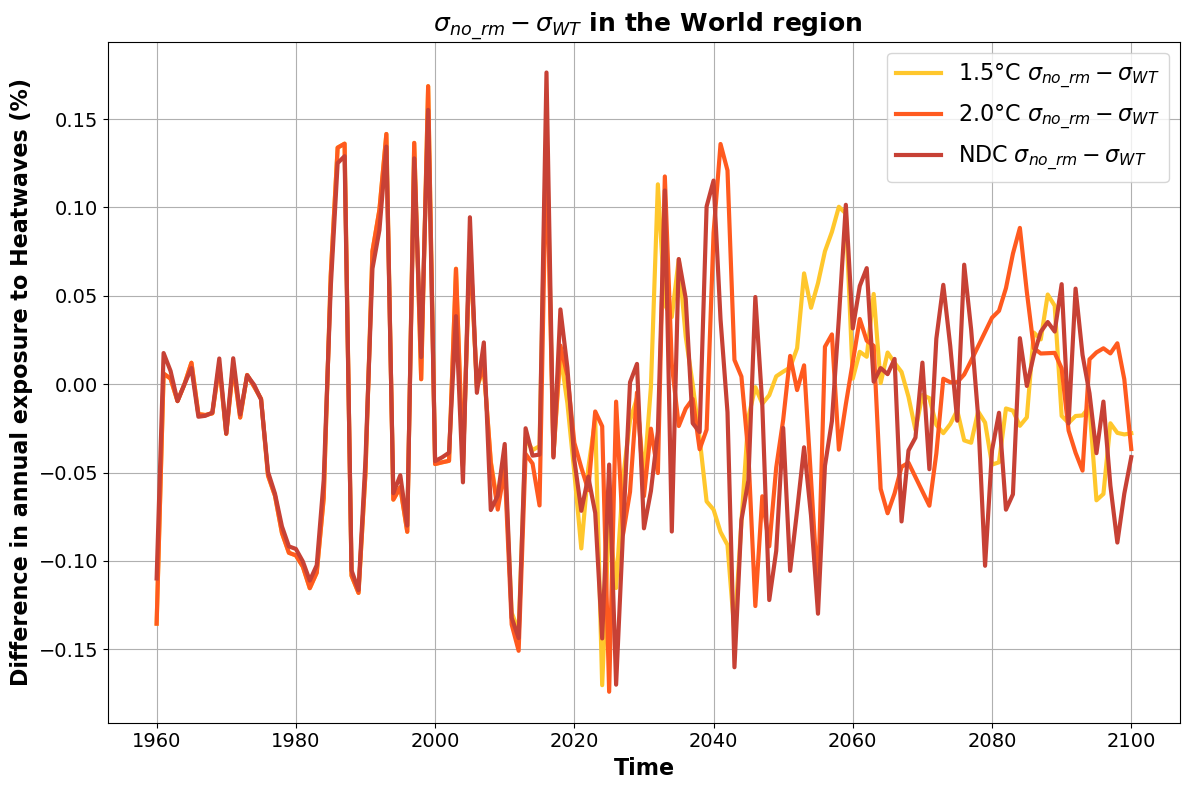

In [71]:
plt.close('all')

plt.figure(figsize=(12, 8))

# Tracer la différence (no_rm - rm) pour chaque scénario
plt.plot(
    year_range[:-13],
    ((y_std_15_no_rm)*100 - WT_landfrac_15_plot_mms),
    linestyle='-',
    color=GMT_color[0],
    label=GMT_label[0] + r' $\sigma_{no\_rm} - \sigma_{WT}$',
    lw=3
)

plt.plot(
    year_range[:-13],
    ((y_std_20_no_rm)*100 - WT_landfrac_20_plot_mms),
    linestyle='-',
    color=GMT_color[1],
    label=GMT_label[1] + r' $\sigma_{no\_rm} - \sigma_{WT}$',
    lw=3
)

plt.plot(
    year_range[:-13],
    ((y_std_NDC_no_rm)*100- WT_landfrac_NDC_plot_mms),
    linestyle='-',
    color=GMT_color[2],
    label=GMT_label[2] + r' $\sigma_{no\_rm} - \sigma_{WT}$',
    lw=3
)

# Mise en forme du graphique
plt.title(
    r' $\sigma_{no\_rm} - \sigma_{WT}$' +' in the {} region'.format(region_name),
    fontsize=18,
    fontweight='bold'
)
plt.xlabel("Time", fontsize=16, fontweight='bold')
plt.ylabel("Difference in annual exposure to {} (%)".format(extr_name), fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig7b_std_lfe_gmt_original_no_rm_thiery_et_al_diff.png')
plt.show()

Plot of the error of $\sigma$ of S2S flags['rm'] = 'no_rm' and Thiery et al.(2021) results

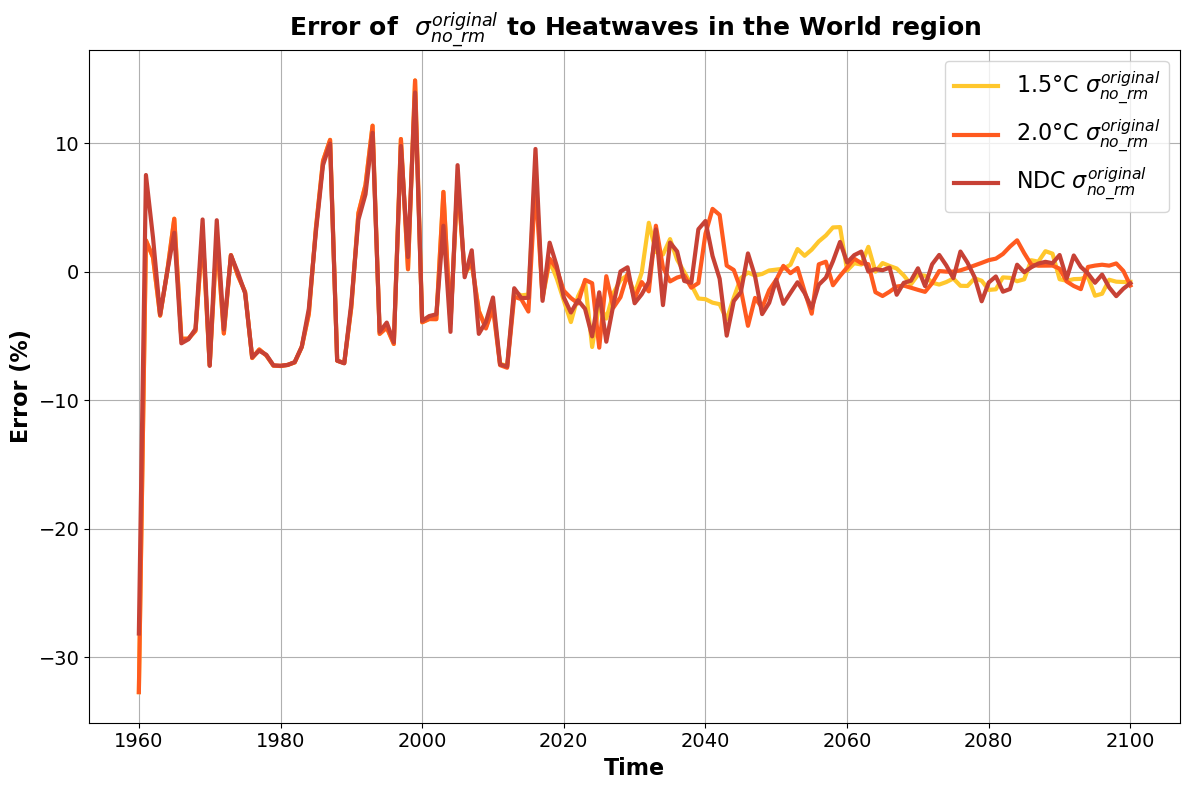

In [72]:
plt.close('all')

plt.figure(figsize=(12, 8))

plt.plot(
    year_range[:-13],
    (((y_std_15_no_rm)*100 - WT_landfrac_15_plot_mms)/WT_landfrac_15_plot_mms)*100,
    linestyle='-',
    color=GMT_color[0],
    label=GMT_label[0] + r' $\sigma_{no\_rm}^{original}$',
    lw=3
)

plt.plot(
    year_range[:-13],
    (((y_std_20_no_rm)*100 - WT_landfrac_20_plot_mms)/WT_landfrac_20_plot_mms)*100,
    linestyle='-',
    color=GMT_color[1],
    label=GMT_label[1] + r' $\sigma_{no\_rm}^{original}$',
    lw=3
)

plt.plot(
    year_range[:-13],
    (((y_std_NDC_no_rm)*100- WT_landfrac_NDC_plot_mms)/WT_landfrac_NDC_plot_mms)*100,
    linestyle='-',
    color=GMT_color[2],
    label=GMT_label[2] + r' $\sigma_{no\_rm}^{original}$',
    lw=3
)

# Mise en forme du graphique
plt.title("Error of " + r' $\sigma_{no\_rm}^{original}$' + " to Heatwaves in the {} region".format(region_name),
    fontsize=18,
    fontweight='bold'
)
plt.xlabel("Time", fontsize=16, fontweight='bold')
plt.ylabel("Error (%)", fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig7c_std_lfe_gmt_original_no_rm_thiery_et_al_error.png')
plt.show()

### Effect of the Geometric Mean 

## 2. Results of emissions2npeople

### The Neptun Deep Assessment

#### 1. The smoothing effect

Plot of the values given by Thiery et al.(2021) and the S2S framework with the different combinaison of flags['gmt'] and flags['rm']

In [73]:
# Load the values computed by the Wim Thiery Expert Report #

with open(data_dir+'source2suffering/assessment/Neptun_Deep/ds_WT_NeptunDeep.pkl', 'rb') as f:
        ds_WT_NeptunDeep = pk.load(f)

# Load the values computed by the Source2Suffering framework #

with open(data_dir+'source2suffering/assessment/Neptun_Deep/ds_S2S_NeptunDeep_gmt_{}_{}.pkl'.format('ar6_new','rm'), 'rb') as f:
        ds_S2S_NeptunDeep_gmt_ar6_new_rm = pk.load(f)

with open(data_dir+'source2suffering/assessment/Neptun_Deep/ds_S2S_NeptunDeep_gmt_{}_{}.pkl'.format('ar6_new','no_rm'), 'rb') as f:
        ds_S2S_NeptunDeep_gmt_ar6_new_no_rm = pk.load(f)

with open(data_dir+'source2suffering/assessment/Neptun_Deep/ds_S2S_NeptunDeep_gmt_{}_{}.pkl'.format('original','rm'), 'rb') as f:
        ds_S2S_NeptunDeep_gmt_original_rm = pk.load(f)

with open(data_dir+'source2suffering/assessment/Neptun_Deep/ds_S2S_NeptunDeep_gmt_{}_{}.pkl'.format('original','no_rm'), 'rb') as f:
        ds_S2S_NeptunDeep_gmt_original_no_rm = pk.load(f)
        
year_start_as = 2010
year_end_as = 2020

birth_cohort_int = list(range(year_start_as, year_end_as + 1))

print(ds_S2S_NeptunDeep_gmt_original_no_rm)

<xarray.Dataset>
Dimensions:                                                    (hazard: 6,
                                                                birth_year: 22)
Coordinates:
  * hazard                                                     (hazard) <U20 ...
  * birth_year                                                 (birth_year) int64 ...
Data variables:
    valc_nr_children_facing_extra_hazard_NeptunDeep            (hazard, birth_year) float64 ...
    valc_total_nr_children_facing_extra_hazard_NeptunDeep      (hazard) float64 ...
    valc_slope_exposure                                        (hazard, birth_year) float64 ...
    valc_nr_children_facing_extra_hazard_NeptunDeep_ref        (hazard, birth_year) float64 ...
    valc_total_nr_children_facing_extra_hazard_NeptunDeep_ref  (hazard) float64 ...
    valc_slope_exposure_ref                                    (hazard, birth_year) float64 ...


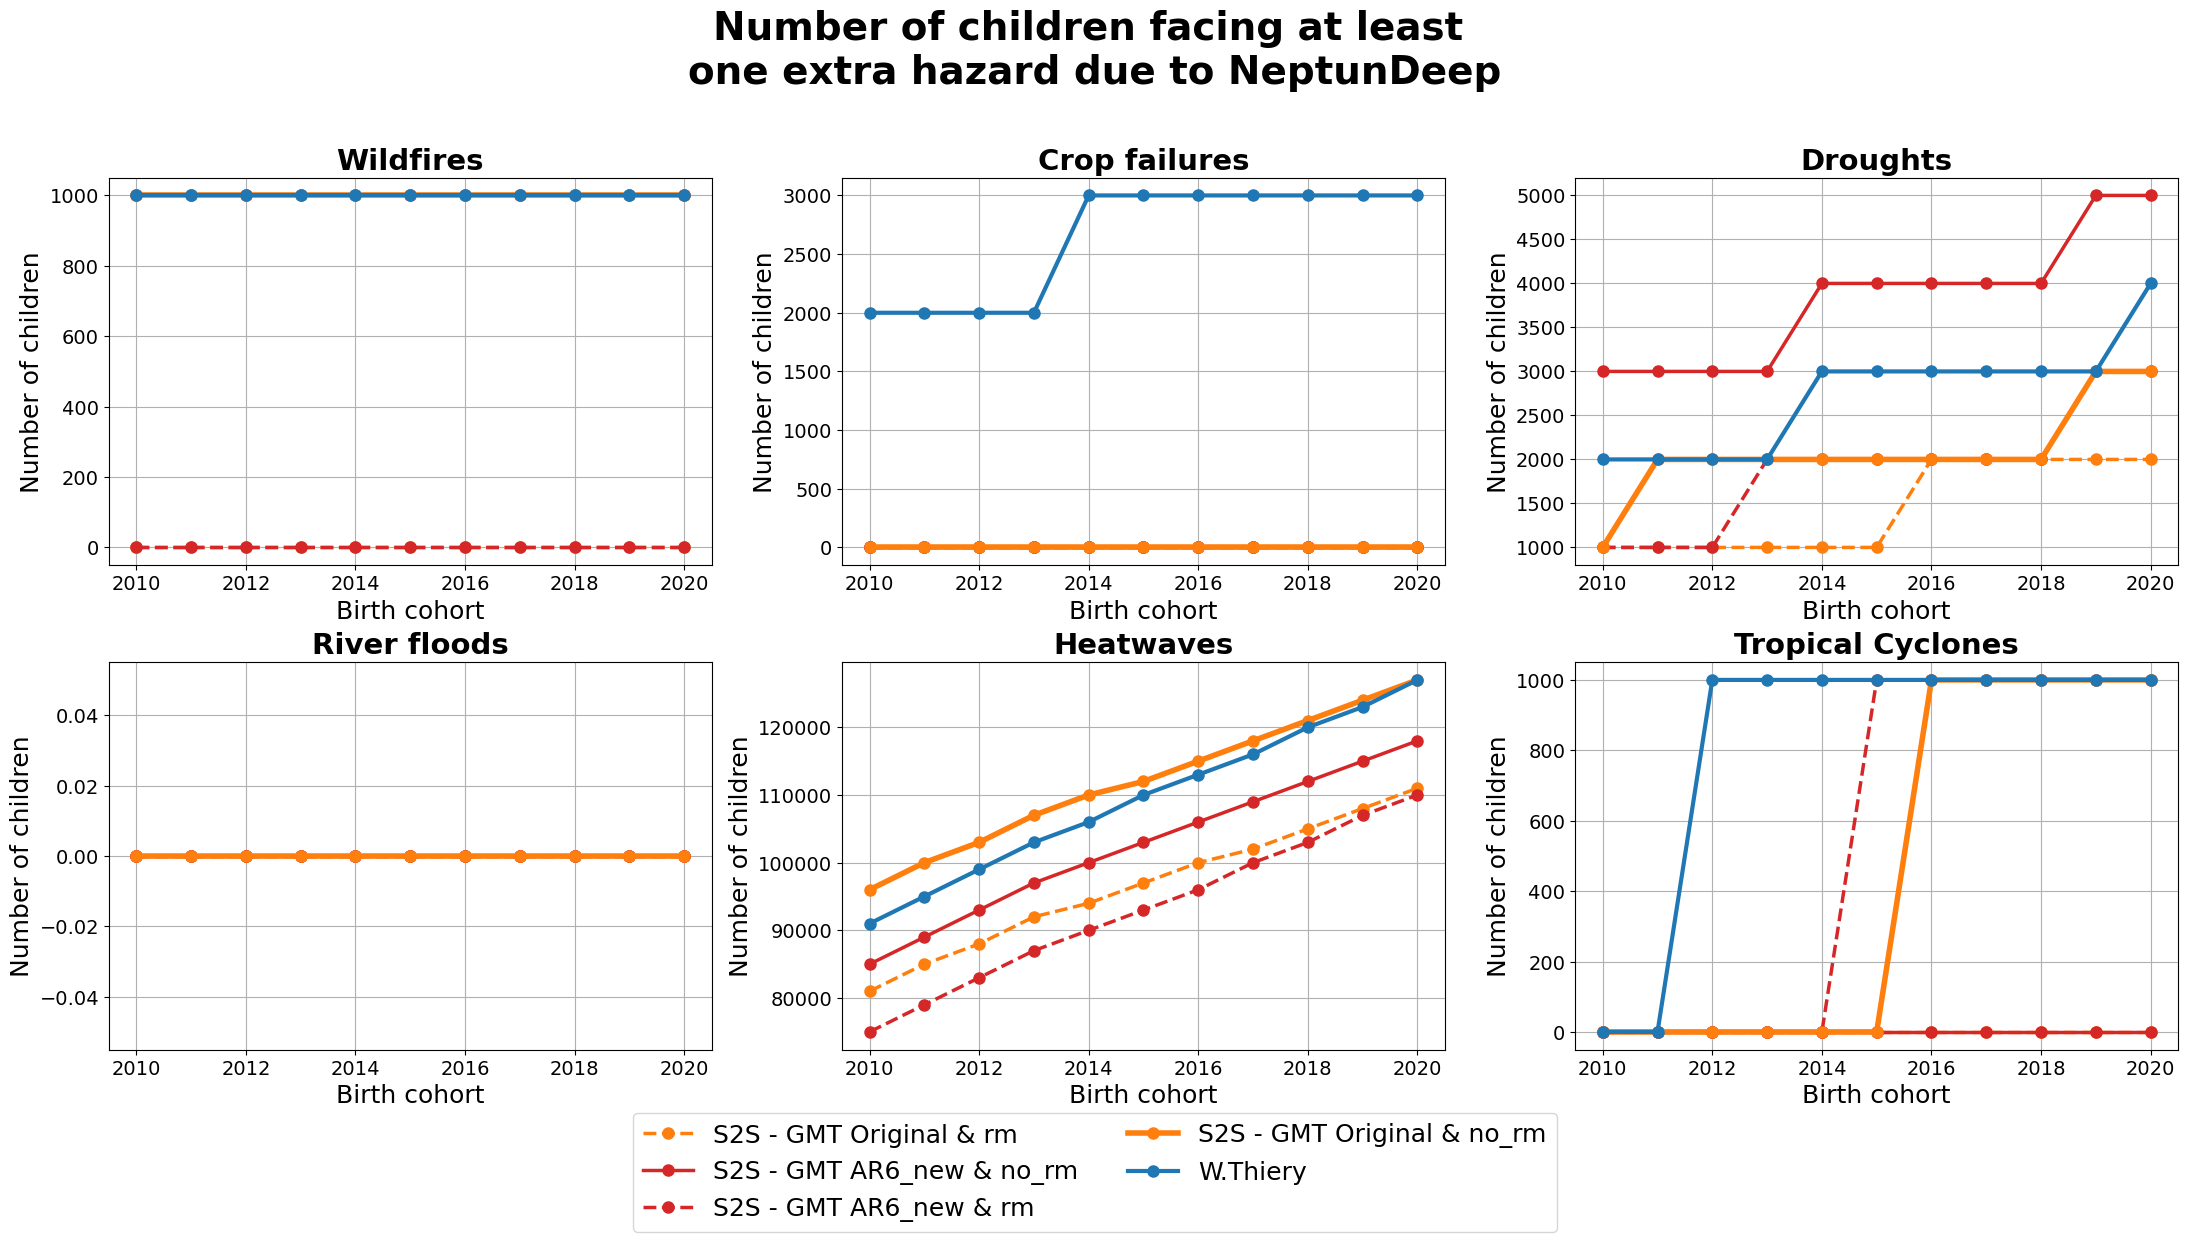

In [74]:
def plot_dev_fig16_subplot(
    wt_valc_ds,
    s2s_ds_ar6_new_rm,
    s2s_ds_ar6_new_no_rm,
    s2s_ds_original_rm,
    s2s_ds_original_no_rm,
    birth_cohort_int
):
    """
    Create subplots comparing W.Thiery et al. (2021) with various Source2Suffering configurations.
    Assumes input arrays are xarray.DataArray with a 'hazard' and 'birth_year' coordinate.
    
    Parameters:
    - wt_valc_ds: xarray.DataArray
    - s2s_ds_ar6_new_rm: xarray.DataArray
    - s2s_ds_ar6_new_no_rm: xarray.DataArray
    - s2s_ds_original_rm: xarray.DataArray
    - s2s_ds_original_no_rm: xarray.DataArray
    - birth_cohort_int: list/array of birth years
    """
    import matplotlib.pyplot as plt

    hazard_names = {
        'burntarea': 'Wildfires',
        'cropfailedarea': 'Crop failures',
        'driedarea': 'Droughts',
        'floodedarea': 'River floods',
        'heatwavedarea': 'Heatwaves',
        'tropicalcyclonedarea': 'Tropical Cyclones'
    }

    hazards = list(wt_valc_ds['hazard'].values)
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(22, 13))
    axs = axs.flatten()

    for idx, hazard in enumerate(hazards):
        ax = axs[idx]
        name = hazard_names.get(hazard, hazard)

        wt_vals = wt_valc_ds.sel(hazard=hazard).sel(birth_year=birth_cohort_int)
        s2s_ar6_new_rm_vals = s2s_ds_ar6_new_rm.sel(hazard=hazard).sel(birth_year=birth_cohort_int)
        s2s_ar6_new_no_rm_vals = s2s_ds_ar6_new_no_rm.sel(hazard=hazard).sel(birth_year=birth_cohort_int)
        s2s_orig_rm_vals = s2s_ds_original_rm.sel(hazard=hazard).sel(birth_year=birth_cohort_int)
        s2s_orig_no_rm_vals = s2s_ds_original_no_rm.sel(hazard=hazard).sel(birth_year=birth_cohort_int)

        ax.plot(birth_cohort_int, s2s_orig_rm_vals, '--o', color="tab:orange", label="S2S - GMT Original & rm", markersize=8, lw=2.5)
        ax.plot(birth_cohort_int, s2s_ar6_new_no_rm_vals, '-o', color="tab:red", label="S2S - GMT AR6_new & no_rm", markersize=8, lw=2.5)
        ax.plot(birth_cohort_int, s2s_ar6_new_rm_vals, '--o', color="tab:red", label="S2S - GMT AR6_new & rm", markersize=8, lw=2.5)
        ax.plot(birth_cohort_int, s2s_orig_no_rm_vals, '-o', color="tab:orange", label="S2S - GMT Original & no_rm", markersize=8, lw=4)
        ax.plot(birth_cohort_int, wt_vals, '-o', color="tab:blue", label="W.Thiery", markersize=8, lw=3)

        ax.set_title(f"{name}", fontsize=21, fontweight='bold')
        ax.set_xlabel("Birth cohort", fontsize=18)
        ax.set_ylabel("Number of children", fontsize=18)
        ax.tick_params(axis='both', labelsize=14)
        ax.grid()

    # Global legend
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, fontsize=18, ncol=2, loc='lower center', bbox_to_anchor=(0.5, -0.0))

    # Super title
    fig.suptitle(
        "Number of children facing at least \none extra hazard due to NeptunDeep",
        fontsize=28, fontweight='bold', y=0.95
    )

    plt.tight_layout(rect=[0, 0.05, 1, 0.93])
    plt.subplots_adjust(bottom=0.15)
    plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig8a_NeptunDeep_valc_S2S_WT_comp.png')
    plt.show()

plot_dev_fig16_subplot(
ds_WT_NeptunDeep['wt_valc_nr_children_facing_extra_hazard_NeptunDeep'],
ds_S2S_NeptunDeep_gmt_ar6_new_rm['valc_nr_children_facing_extra_hazard_NeptunDeep'],
ds_S2S_NeptunDeep_gmt_ar6_new_no_rm['valc_nr_children_facing_extra_hazard_NeptunDeep'],
ds_S2S_NeptunDeep_gmt_original_rm['valc_nr_children_facing_extra_hazard_NeptunDeep'],
ds_S2S_NeptunDeep_gmt_original_no_rm['valc_nr_children_facing_extra_hazard_NeptunDeep'],
birth_cohort_int
)

Plot of the error given by the S2S framework with the different combinaison of flags['gmt'] and flags['rm'] compare to W.Thiery et al.(2021)

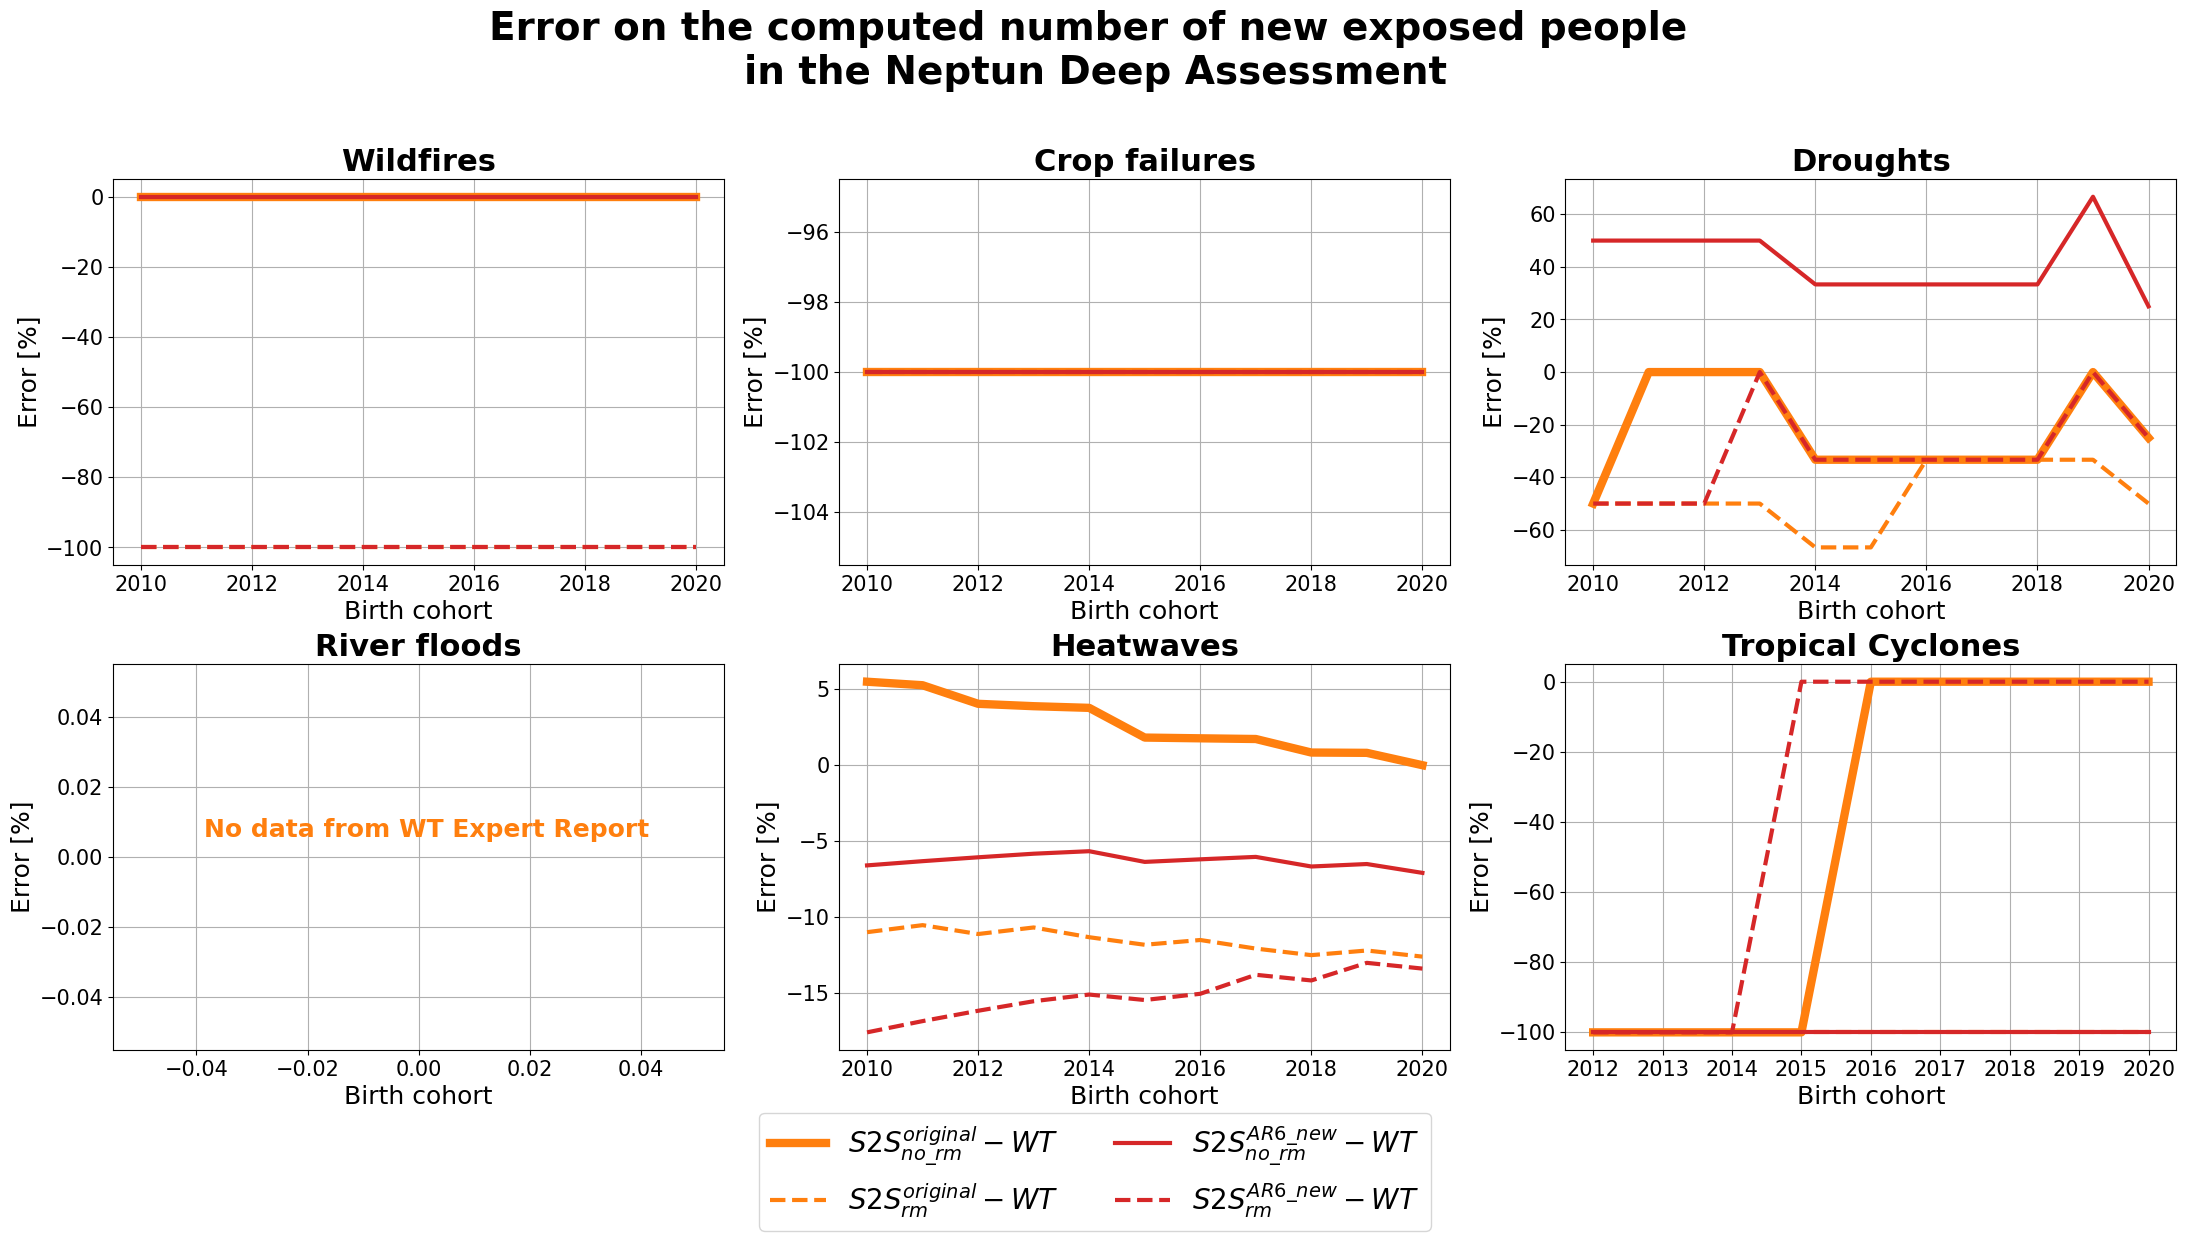

In [75]:
# Create 2x3 subplot layout
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(22, 13))  # Increase height for space below
axs = axs.flatten()

# Hazard name mapping
hazard_names = {
    'burntarea': 'Wildfires',
    'cropfailedarea': 'Crop failures',
    'driedarea': 'Droughts',
    'floodedarea': 'River floods',
    'heatwavedarea': 'Heatwaves',
    'tropicalcyclonedarea': 'Tropical Cyclones'
}

# Loop over hazards
for idx, extr in enumerate(ds_WT_NeptunDeep.coords["hazard"].values):
    ax = axs[idx]
    
    hazards_name = hazard_names[extr]

    ds_WT_sel = ds_WT_NeptunDeep['wt_valc_nr_children_facing_extra_hazard_NeptunDeep'].sel(hazard=extr)
    ds_S2S_orig_no_rm = ds_S2S_NeptunDeep_gmt_original_no_rm['valc_nr_children_facing_extra_hazard_NeptunDeep'].sel(hazard=extr, birth_year=birth_cohort_int)
    ds_S2S_orig_rm = ds_S2S_NeptunDeep_gmt_original_rm['valc_nr_children_facing_extra_hazard_NeptunDeep'].sel(hazard=extr, birth_year=birth_cohort_int)
    ds_S2S_ar6_no_rm = ds_S2S_NeptunDeep_gmt_ar6_new_no_rm['valc_nr_children_facing_extra_hazard_NeptunDeep'].sel(hazard=extr, birth_year=birth_cohort_int)
    ds_S2S_ar6_rm = ds_S2S_NeptunDeep_gmt_ar6_new_rm['valc_nr_children_facing_extra_hazard_NeptunDeep'].sel(hazard=extr, birth_year=birth_cohort_int)

    # Plot percentage error
    ax.plot(
        birth_cohort_int,
        ((ds_S2S_orig_no_rm - ds_WT_sel) / ds_WT_sel) * 100,
        linestyle='-',
        color='tab:orange',
        lw=6,
        label=r'$S2S_{no\_rm}^{original} - WT$' if idx == 0 else None
    )
    ax.plot(
        birth_cohort_int,
        ((ds_S2S_orig_rm - ds_WT_sel) / ds_WT_sel) * 100,
        linestyle='--',
        color='tab:orange',
        lw=3,
        label=r'$S2S_{rm}^{original} - WT$' if idx == 0 else None
    )
    ax.plot(
        birth_cohort_int,
        ((ds_S2S_ar6_no_rm - ds_WT_sel) / ds_WT_sel) * 100,
        linestyle='-',
        color='tab:red',
        lw=3,
        label=r'$S2S_{no\_rm}^{AR6\_new} - WT$' if idx == 0 else None
    )
    ax.plot(
        birth_cohort_int,
        ((ds_S2S_ar6_rm - ds_WT_sel) / ds_WT_sel) * 100,
        linestyle='--',
        color='tab:red',
        lw=3,
        label=r'$S2S_{rm}^{AR6\_new} - WT$' if idx == 0 else None
    )

    ax.set_title(hazards_name, fontsize=22, fontweight='bold')
    ax.set_xlabel("Birth cohort", fontsize=18)
    ax.set_ylabel("Error [%]", fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=15)

# Super title
fig.suptitle(
    "Error on the computed number of new exposed people \nin the Neptun Deep Assessment",
    fontsize=28, fontweight='bold', y=0.95  # plus bas que la valeur par défaut (~0.98)
)

# Global legend placed at the bottom center
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    fontsize=20, ncol=2,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.0)
)

# Add "no data" text in bottom-left corner
fig.text(0.095, 0.31, "No data from WT Expert Report", fontsize=18, ha='left', va='bottom', color="tab:orange", fontweight='bold')

# Adjust layout to free space for the legend and text
plt.tight_layout(rect=[0, 0.05, 1, 0.93])
plt.subplots_adjust(bottom=0.15)  # leave space at bottom for text and legend
plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig8b_NeptunDeep_valc_S2S_WT_errror.png')
plt.show()

Plot of the total value of number of children affected

In [76]:
# Load the values computed by the Wim Thiery Expert Report #

with open(data_dir+'source2suffering/assessment/Neptun_Deep/ds_WT_NeptunDeep.pkl', 'rb') as f:
        ds_WT_NeptunDeep = pk.load(f)

# Load the values computed by the Source2Suffering framework #

with open(data_dir+'source2suffering/assessment/Neptun_Deep/ds_S2S_NeptunDeep_gmt_{}_{}.pkl'.format('original','no_rm'), 'rb') as f:
        ds_S2S_NeptunDeep_gmt_original_no_rm = pk.load(f)

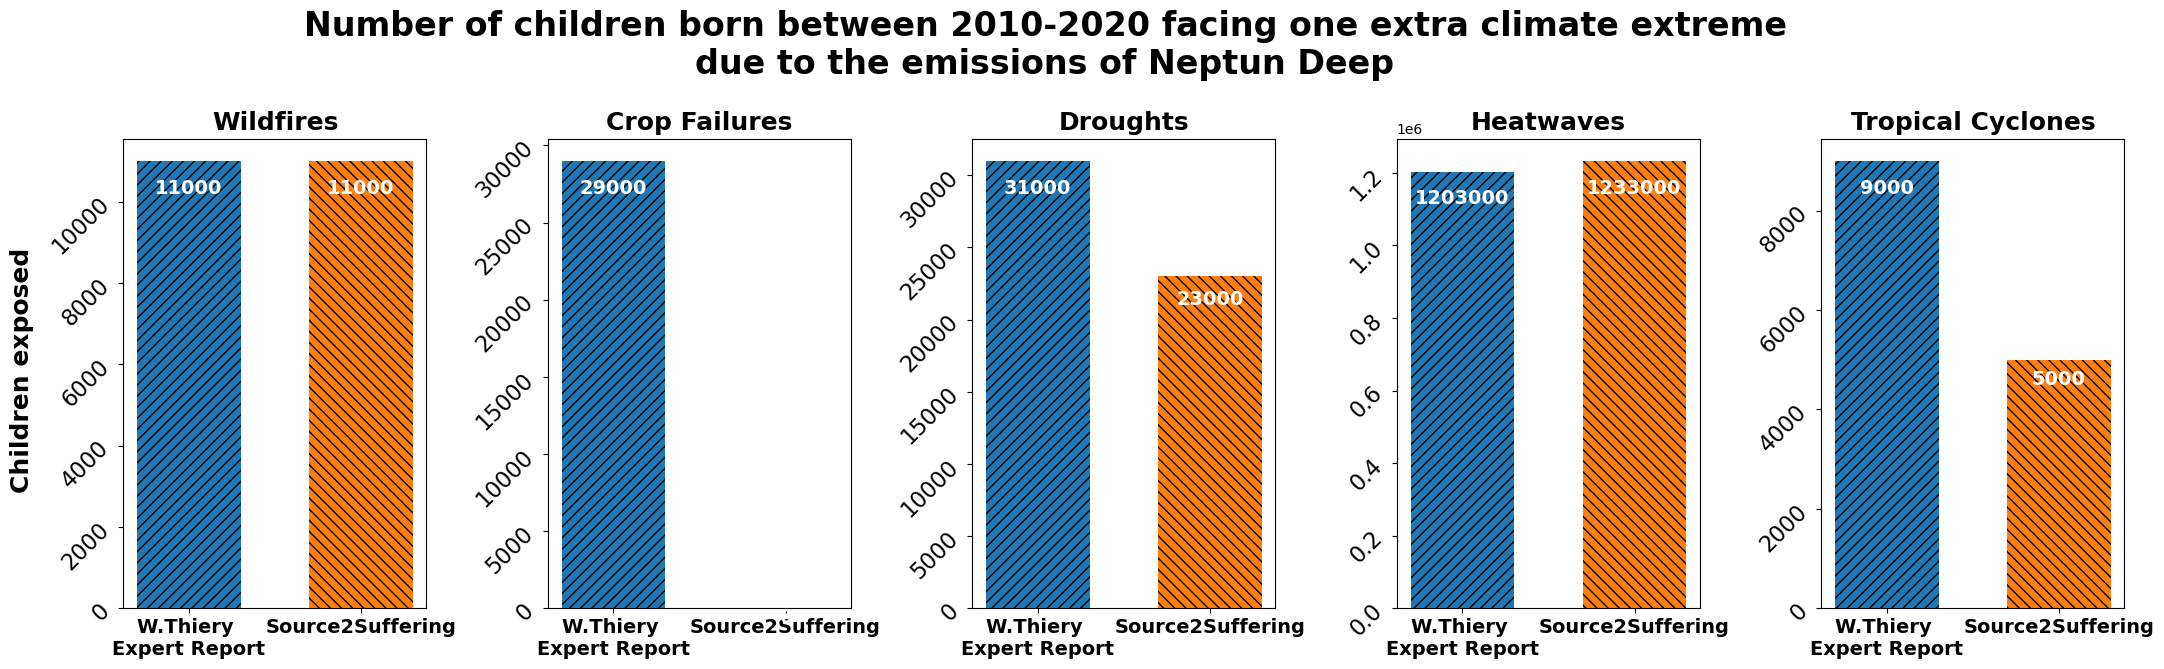

In [77]:
import matplotlib.pyplot as plt
import numpy as np

plt.close('all')

# Get original data
hazards_all = ds_S2S_NeptunDeep_gmt_original_no_rm[
    'valc_total_nr_children_facing_extra_hazard_NeptunDeep'
].coords['hazard'].values

values_S2S_all = ds_S2S_NeptunDeep_gmt_original_no_rm[
    'valc_total_nr_children_facing_extra_hazard_NeptunDeep'
].values

values_wt_all = ds_WT_NeptunDeep[
    'wt_total_valc_nr_children_facing_extra_hazard_NeptunDeep'
].values

# Exclude 'floodedarea'
mask = hazards_all != 'floodedarea'

hazards = hazards_all[mask]
values_S2S = values_S2S_all[mask]
values_wt = values_wt_all[mask]

n = len(hazards)

# Create subplots
fig, axs = plt.subplots(1, n, figsize=(4.5*n, 8), sharey=False)

if n == 1:
    axs = [axs]

# Prettier hazard names
hazards_name = ['Wildfires', 'Crop Failures', 'Droughts', 'Heatwaves', 'Tropical Cyclones']

# Plot each hazard
for i in range(n):
    ax = axs[i]

    # Bars
    bar_wt = ax.bar(0, values_wt[i], width=0.6, color='tab:blue', hatch='///', label='Weighted')
    bar_s2s = ax.bar(1, values_S2S[i], width=0.6, color='tab:orange', hatch='\\\\\\', label='Reference')

    # Axis config
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['W.Thiery \nExpert Report', 'Source2Suffering'], fontsize=14, fontweight='bold')
    ax.tick_params(axis='y', labelsize=16, rotation=45)

    ax.set_title(hazards_name[i], fontsize=18, fontweight='bold')
    
    # Remove y-axis label from individual plots
    ax.set_ylabel('')

    # Annotate values on top
    if not np.isnan(values_wt[i]):
        ax.text(0, values_wt[i]*0.96, f'{values_wt[i]:.0f}', ha='center', va='top', 
                color='white', fontweight='bold', fontsize=14)
    if not np.isnan(values_S2S[i]):
        ax.text(1, values_S2S[i]*0.96, f'{values_S2S[i]:.0f}', ha='center', va='top', 
                color='white', fontweight='bold', fontsize=14)

# Add a single y-axis label for all subplots
fig.text(0.04, 0.45, 'Children exposed', va='center', rotation='vertical', fontsize=18, fontweight='bold')

# Global title and layout
fig.suptitle(
    "Number of children born between 2010-2020 facing one extra climate extreme\n"
    "due to the emissions of Neptun Deep",
    fontsize=24, fontweight='bold', y=0.90
)

# Improve spacing and layout
plt.tight_layout(rect=[0.05, 0.07, 1, 0.90])

# Optional legend below the plots
handles, labels = axs[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=12)

plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig9a_NeptunDeep_valc_total_S2S_WT_comp.png')
plt.show()

Plot of the total value of number of children affected for the reference period

In [78]:
# Load the values computed by the Wim Thiery Expert Report #

with open(data_dir+'source2suffering/assessment/Neptun_Deep/ds_WT_NeptunDeep.pkl', 'rb') as f:
        ds_WT_NeptunDeep = pk.load(f)

# Load the values computed by the Source2Suffering framework #

with open(data_dir+'source2suffering/assessment/Neptun_Deep/ds_S2S_NeptunDeep_gmt_{}_{}.pkl'.format('original','no_rm'), 'rb') as f:
        ds_S2S_NeptunDeep_gmt_original_no_rm = pk.load(f)

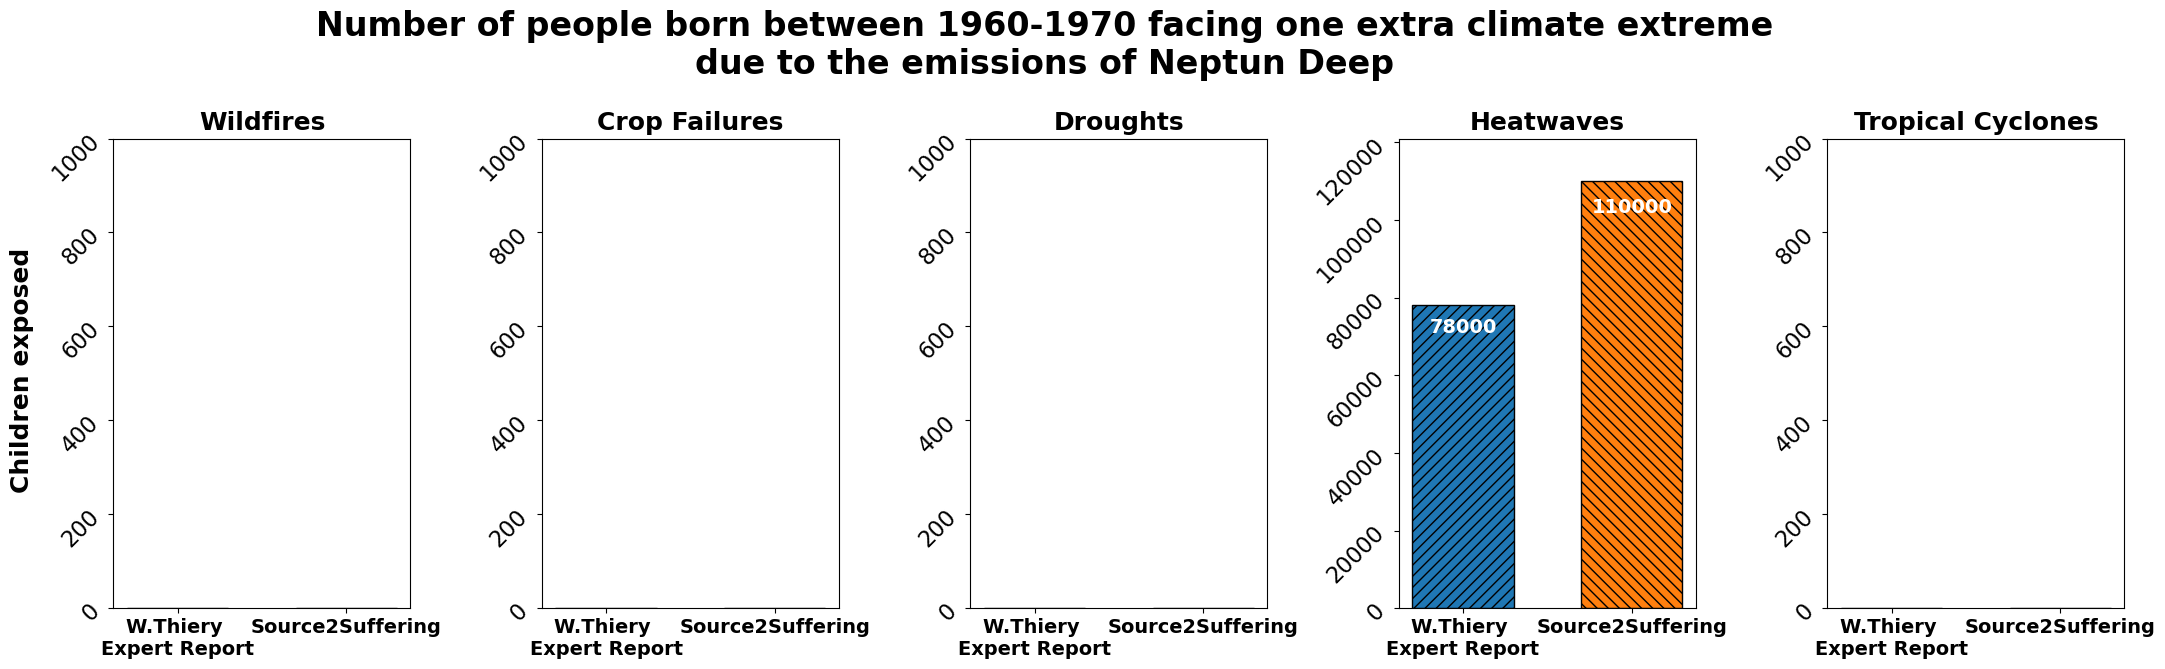

In [79]:
plt.close('all')

# Get original hazard labels
hazards_all = ds_S2S_NeptunDeep_gmt_original_no_rm[
    'valc_total_nr_children_facing_extra_hazard_NeptunDeep_ref'
].coords['hazard'].values

# Load reference Source2Suffering values
values_S2S_all = ds_S2S_NeptunDeep_gmt_original_no_rm[
    'valc_total_nr_children_facing_extra_hazard_NeptunDeep_ref'
].values

# Load reference W.Thiery values
values_wt_all = ds_WT_NeptunDeep[
    'wt_total_valc_nr_children_facing_extra_hazard_NeptunDeep_ref'
].values

# Exclude 'floodedarea'
mask = hazards_all != 'floodedarea'

hazards = hazards_all[mask]
values_S2S = values_S2S_all[mask]
values_wt = values_wt_all[mask]

n = len(hazards)

# Create subplots
fig, axs = plt.subplots(1, n, figsize=(4.5 * n, 8), sharey=False)

if n == 1:
    axs = [axs]

# Prettier hazard names (adapt if needed)
hazards_name = ['Wildfires', 'Crop Failures', 'Droughts', 'Heatwaves', 'Tropical Cyclones']

# Plot each hazard
for i in range(n):
    ax = axs[i]

    # Bars
    # Bars with hatching
    bar_wt = ax.bar(0, values_wt[i], width=0.6, color='tab:blue', hatch='///', edgecolor='black', label='Weighted')
    bar_s2s = ax.bar(1, values_S2S[i], width=0.6, color='tab:orange', hatch='\\\\\\', edgecolor='black', label='Reference')


    # Axis config
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['W.Thiery \nExpert Report', 'Source2Suffering'], fontsize=14, fontweight='bold')
    ax.tick_params(axis='y', labelsize=16, rotation=45)

    ax.set_title(hazards_name[i], fontsize=18, fontweight='bold')

    # Y-axis range
    ymin = 0  # Toujours 0 en bas
    ymax = max(values_wt[i], values_S2S[i])

    if ymax == 0 or np.isnan(ymax):
        ax.set_ylim([0, 1000])  # Cas où les deux valeurs sont nulles → éviter les axes vides
    else:
        ax.set_ylim([0, ymax * 1.1])  # Marge de 10 %

    # Remove y-axis label from individual plots
    ax.set_ylabel('')

    # Annotate values on top
    if not np.isnan(values_wt[i]) and values_wt[i] > 0:
        ax.text(0, values_wt[i] * 0.96, f'{values_wt[i]:.0f}', ha='center', va='top',
                color='white', fontweight='bold', fontsize=14)
    if not np.isnan(values_S2S[i]) and values_S2S[i] > 0:
        ax.text(1, values_S2S[i] * 0.96, f'{values_S2S[i]:.0f}', ha='center', va='top',
                color='white', fontweight='bold', fontsize=14)

# Add a single y-axis label for all subplots
fig.text(0.04, 0.45, 'Children exposed', va='center', rotation='vertical', fontsize=18, fontweight='bold')

# Global title and layout
fig.suptitle(
    "Number of people born between 1960-1970 facing one extra climate extreme\n"
    "due to the emissions of Neptun Deep",
    fontsize=24, fontweight='bold', y=0.90
)

# Improve spacing and layout
plt.tight_layout(rect=[0.05, 0.07, 1, 0.90])

# Save figure
plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig9b_NeptunDeep_valc_total_ref_cohort_S2S_WT_comp.png')
plt.show()


#### 2.Comparison of the metric : Slope hazard/°C

In [80]:
# Load the values computed by the Source2Suffering framework #

with open(data_dir+'source2suffering/assessment/Neptun_Deep/ds_S2S_NeptunDeep_gmt_{}_{}.pkl'.format('original','no_rm'), 'rb') as f:
        ds_S2S_NeptunDeep_gmt_original_no_rm = pk.load(f)

# Load the original values of Thiery et al.(2021) behind the Expert Report #

with open(data_dir+'source2suffering/assessment/Neptun_Deep/ds_WT_NeptunDeep.pkl', 'rb') as f:
        ds_WT_NeptunDeep = pk.load(f)

Comparison of the values of the slope of exposure between WT and S2S

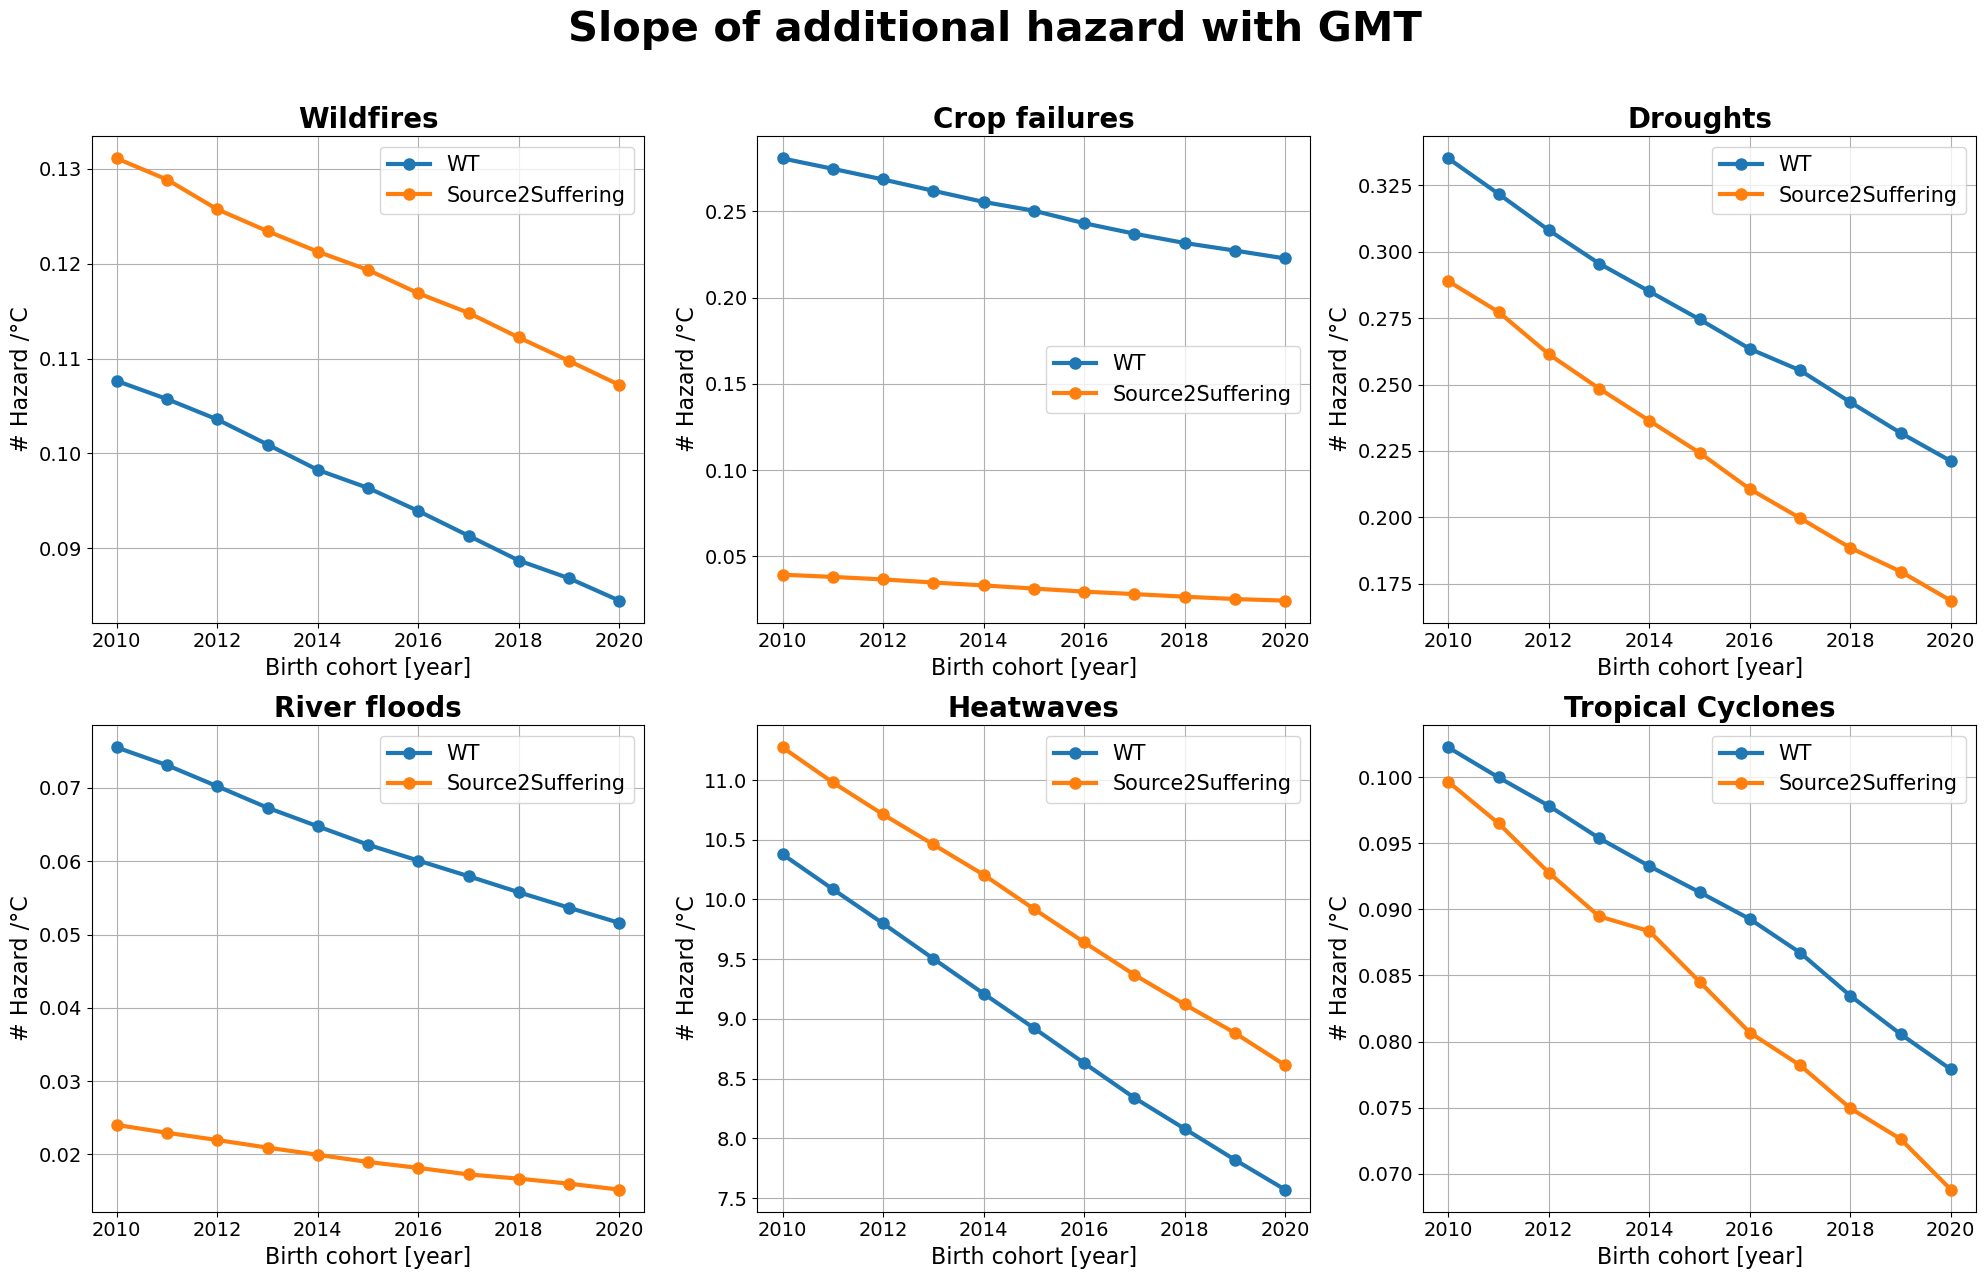

In [81]:
# Create 2x3 subplot layout
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 13))
axs = axs.flatten()  # Flatten for easier indexing

# Dictionary to map hazard codes to readable names
hazard_names = {
    'burntarea': 'Wildfires',
    'cropfailedarea': 'Crop failures',
    'driedarea': 'Droughts',
    'floodedarea': 'River floods',
    'heatwavedarea': 'Heatwaves',
    'tropicalcyclonedarea': 'Tropical Cyclones'
}

# Loop over hazards and plot each in a subplot
for idx, extr in enumerate(ds_WT_NeptunDeep.coords["hazard"].values):
    ax = axs[idx]

    # Extract slope data for both sources
    da_WT_slope_extr = ds_WT_NeptunDeep['valc_slope_exposure'].sel(hazard=extr)
    da_S2S_slope_extr = ds_S2S_NeptunDeep_gmt_original_no_rm['valc_slope_exposure'].sel(hazard=extr, birth_year=birth_cohort_int)

    # Plot data
    ax.plot(
        birth_cohort_int, da_WT_slope_extr,
        marker='o', linestyle='-', color='tab:blue', lw=3, markersize=8, label="WT"
    )
    ax.plot(
        birth_cohort_int, da_S2S_slope_extr,
        marker='o', linestyle='-', color='tab:orange', lw=3, markersize=8, label="Source2Suffering"
    )

    # Titles and labels
    ax.set_title(hazard_names[extr], fontsize=20, fontweight='bold')
    ax.set_xlabel('Birth cohort [year]', fontsize=16)
    ax.set_ylabel('# Hazard /°C', fontsize=16)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=14)  # No rotation
    ax.legend(fontsize=15)

# Add super title
fig.suptitle("Slope of additional hazard with GMT", fontsize=30, fontweight='bold')

# Adjust layout to make room for the suptitle
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show plot
plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig10a_NeptunDeep_slope_exposure_S2S_WT_comp.png')
plt.show()


Relative error of the values of the slope of exposure between WT and S2S

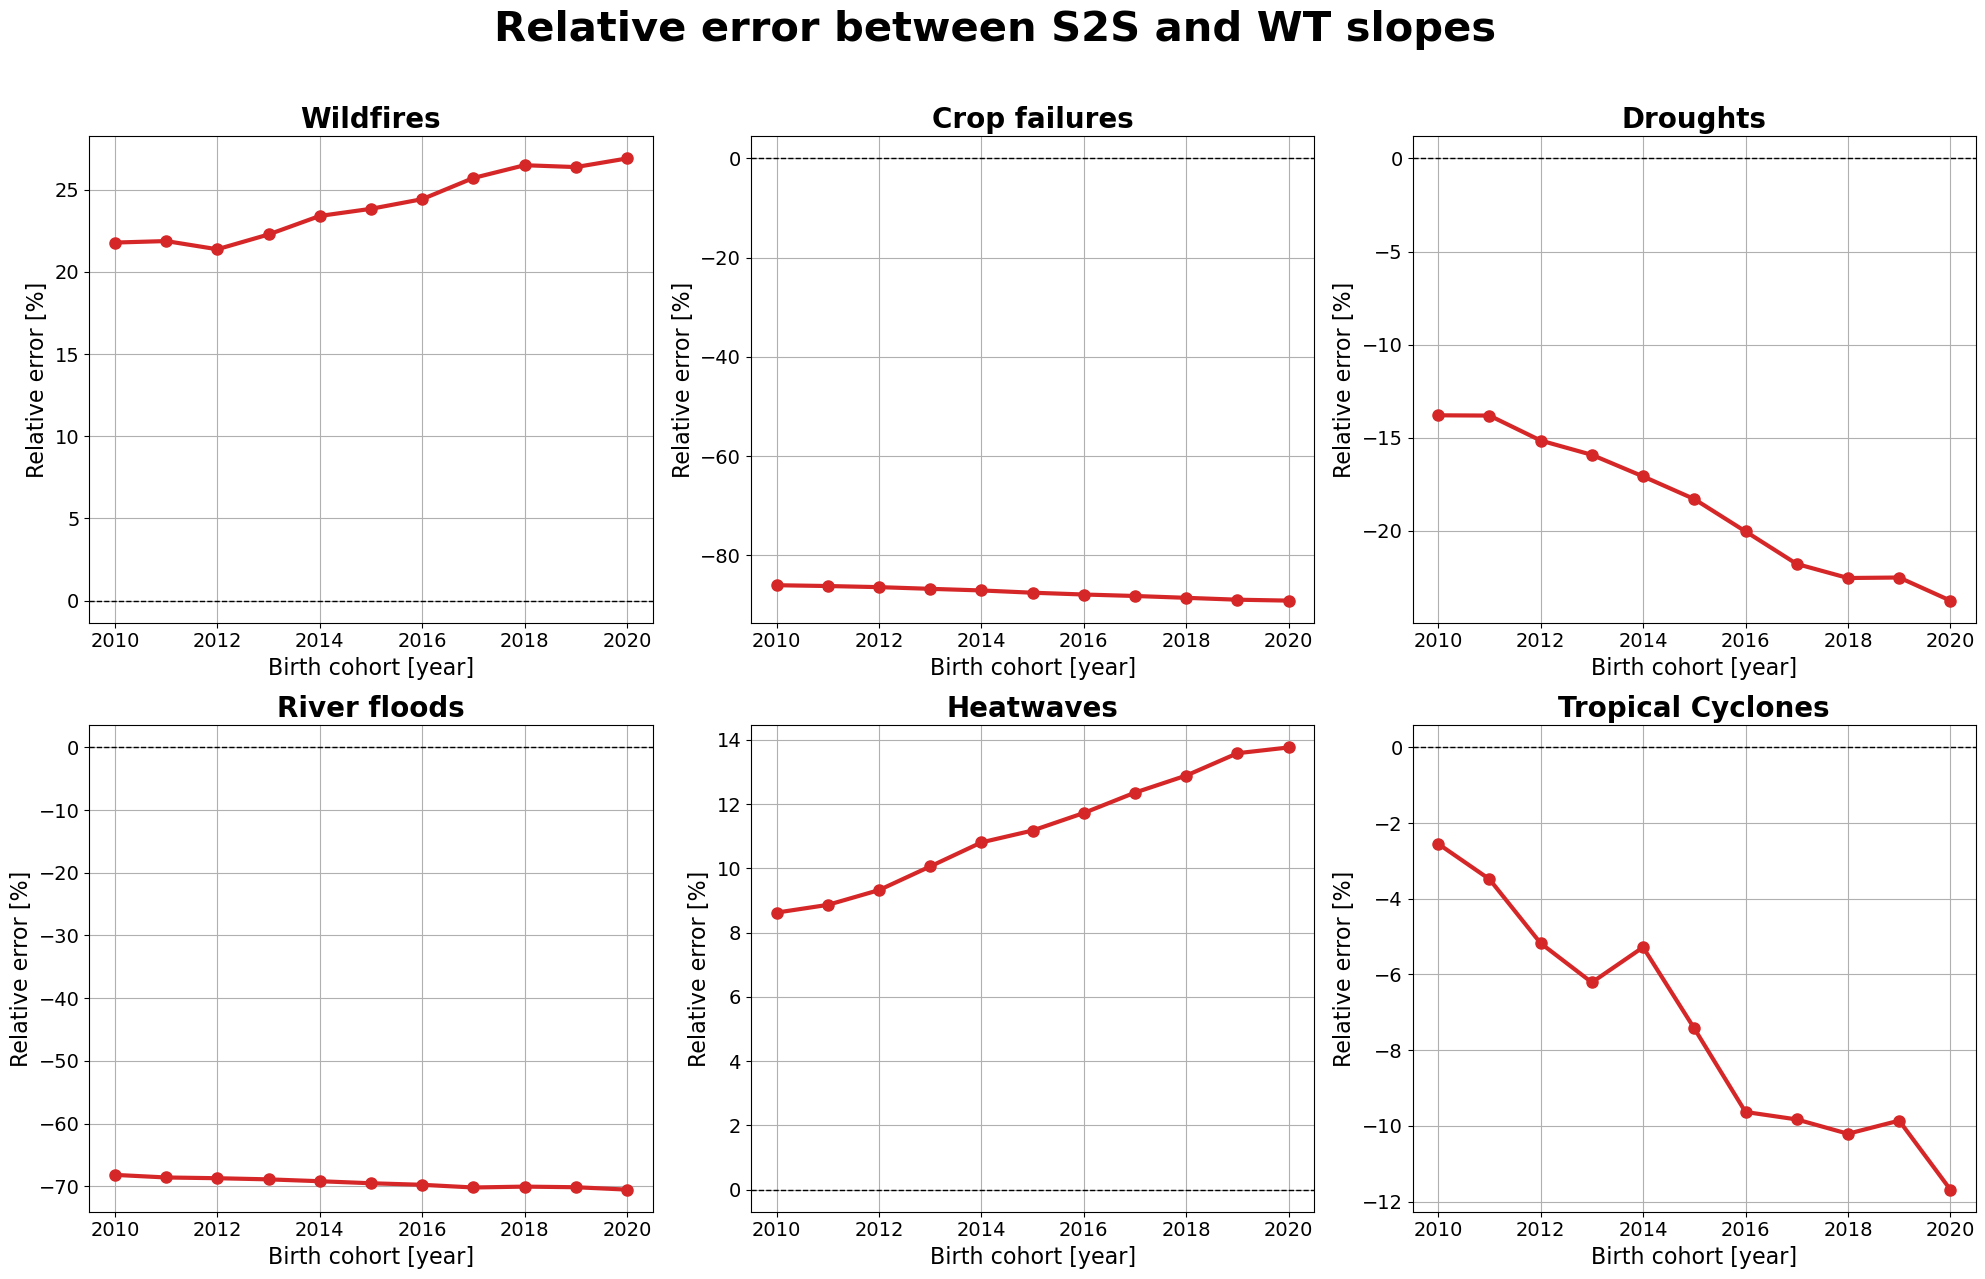

In [82]:
# Create 2x3 subplot layout
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 13))
axs = axs.flatten()  # Flatten for easier indexing

# Dictionary to map hazard codes to readable names
hazard_names = {
    'burntarea': 'Wildfires',
    'cropfailedarea': 'Crop failures',
    'driedarea': 'Droughts',
    'floodedarea': 'River floods',
    'heatwavedarea': 'Heatwaves',
    'tropicalcyclonedarea': 'Tropical Cyclones'
}

# Loop over hazards and plot each in a subplot
for idx, extr in enumerate(ds_WT_NeptunDeep.coords["hazard"].values):
    ax = axs[idx]

    # Extract slope data for both sources
    da_WT_slope_extr = ds_WT_NeptunDeep['valc_slope_exposure'].sel(hazard=extr)
    da_S2S_slope_extr = ds_S2S_NeptunDeep_gmt_original_no_rm['valc_slope_exposure'].sel(hazard=extr, birth_year=birth_cohort_int)

    # Compute relative error in percent
    relative_error = ((da_S2S_slope_extr - da_WT_slope_extr) / da_WT_slope_extr) * 100

    # Plot error
    ax.plot(
        birth_cohort_int, relative_error,
        marker='o', linestyle='-', color='tab:red', lw=3, markersize=8
    )

    # Titles and labels
    ax.set_title(hazard_names[extr], fontsize=20, fontweight='bold')
    ax.set_xlabel('Birth cohort [year]', fontsize=16)
    ax.set_ylabel('Relative error [%]', fontsize=16)
    ax.grid(True)
    ax.axhline(0, color='black', linestyle='--', linewidth=1)  # reference line at 0
    ax.tick_params(axis='both', labelsize=14)

# Add super title
fig.suptitle("Relative error between S2S and WT slopes", fontsize=30, fontweight='bold')

# Adjust layout to make room for the suptitle
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save and show plot
plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig10b_slope_exposure_S2S_WT_error.png')
plt.show()

#### 3.Effect of the Demography differences

##### 3.1 Study the valp_cohort_size_abs object from S2S

In [92]:
# Load the demography object valp_cohort_size_abs from S2S #

with open(data_dir+'Wittgenstein_Centre/valp_cohort_size_abs.pkl', 'rb') as f:
        valp_cohort_size_abs_S2S = pk.load(f)

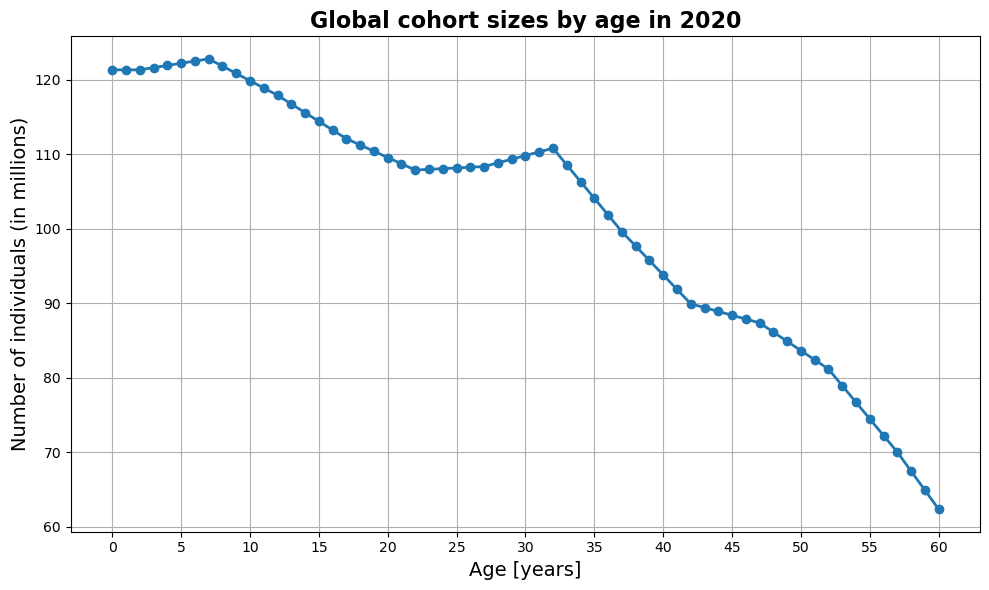

In [94]:
# Ages from 0 to 60 years
ages = np.arange(61)  # 0 to 60 inclusive

# Extract cohort sizes for the year 2020 (column 11)
cohort_sizes_world_2020 = valp_cohort_size_abs_S2S[:, 11]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(ages, cohort_sizes_world_2020 / 1e6, marker='o', color='tab:blue', lw=2)

plt.title("Global cohort sizes by age in 2020", fontsize=16, fontweight='bold')
plt.xlabel("Age [years]", fontsize=14)
plt.ylabel("Number of individuals (in millions)", fontsize=14)
plt.grid(True)
plt.xticks(np.arange(0, 61, 5))
plt.tight_layout()
plt.show()


## ?. Results of the Lifetime Exposure (LE) assessment

### Effect of the smoothing before remapping

### Effect of the Geometric Mean

### Effect of the Demography differences 

### SR15 Vs AR6 Stylized trajectories